The first visits were implemented on 20230710

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel
from astropy.visualization import simple_norm
from photutils.aperture import aperture_photometry
from photutils.aperture import ApertureStats
import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from photutils.aperture import CircularAnnulus, CircularAperture
from astropy.stats import SigmaClip
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [59]:
epoch = 3
path = '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch{}/'.format(epoch)
wpath = '{}wfc3/'.format(path)
apath = '{}acs/'.format(path)

WFC3 first

In [60]:
drcs = glob.glob('{}*drc.fits'.format(wpath))
drcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05010_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05020_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05031_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05041_drc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05051_drc.fits']

In [61]:
flcs = glob.glob('{}*flc.fits'.format(wpath))
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits']

In [62]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
# eetab

In [63]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drc in drcs:
    hdr = fits.getheader(drc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
drcargs = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[drcargs], bands[drcargs], times[drcargs], expt[drcargs], dates[drcargs], datasets[drcargs] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

# for i in range(len(flcs)):
#     print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

if3i05010_drc.fits F275W 60135.88636996 1770.0
if3i05020_drc.fits F280N 60135.89455292 1770.0
if3i05031_drc.fits F225W 60135.9027707 1180.0
if3i05041_drc.fits F225W 60135.96890478 1180.0
if3i05051_drc.fits F225W 60136.03493478 1180.0


[None, None, None, None, None]

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05010_drc.fits
F275W
1770.0
   aperture_sum   
------------------
0.8554250205044212
3.5478520126826976e-18 9.093301851973693e-20
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     486   751.7       0.8554          0.02198   -0.0023              0.8577


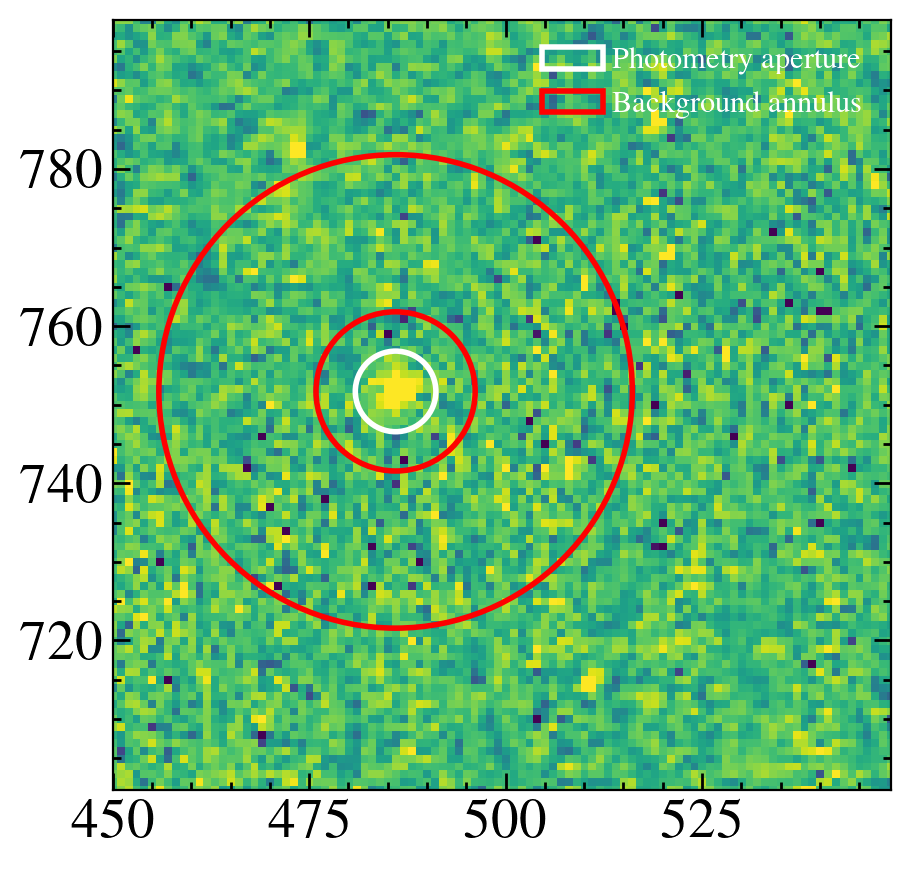

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05020_drc.fits
F280N
1770.0
   aperture_sum   
------------------
0.6099521288908836
4.157534382510037e-17 1.3491280285458708e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     486   751.7         0.61          0.01856   0.03789              0.5721


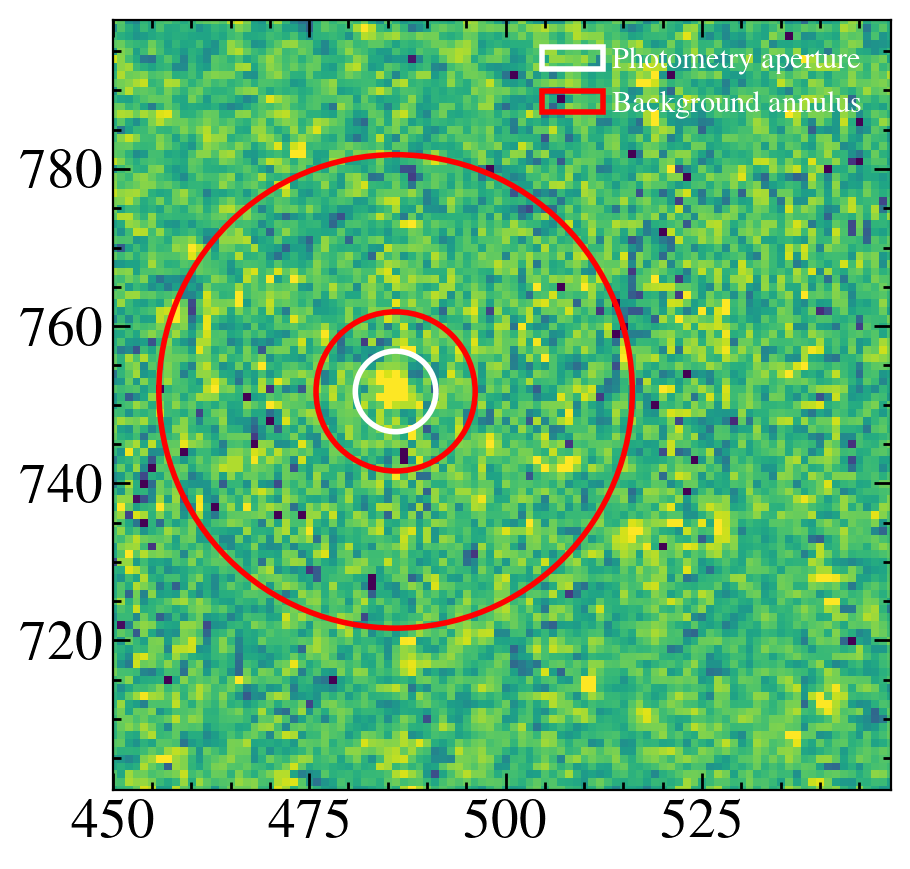

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05031_drc.fits
F225W
1180.0
   aperture_sum  
-----------------
0.564643530265276
3.3293364235146428e-18 1.3046027003472668e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     486   751.7       0.5646          0.02187  0.006398              0.5582


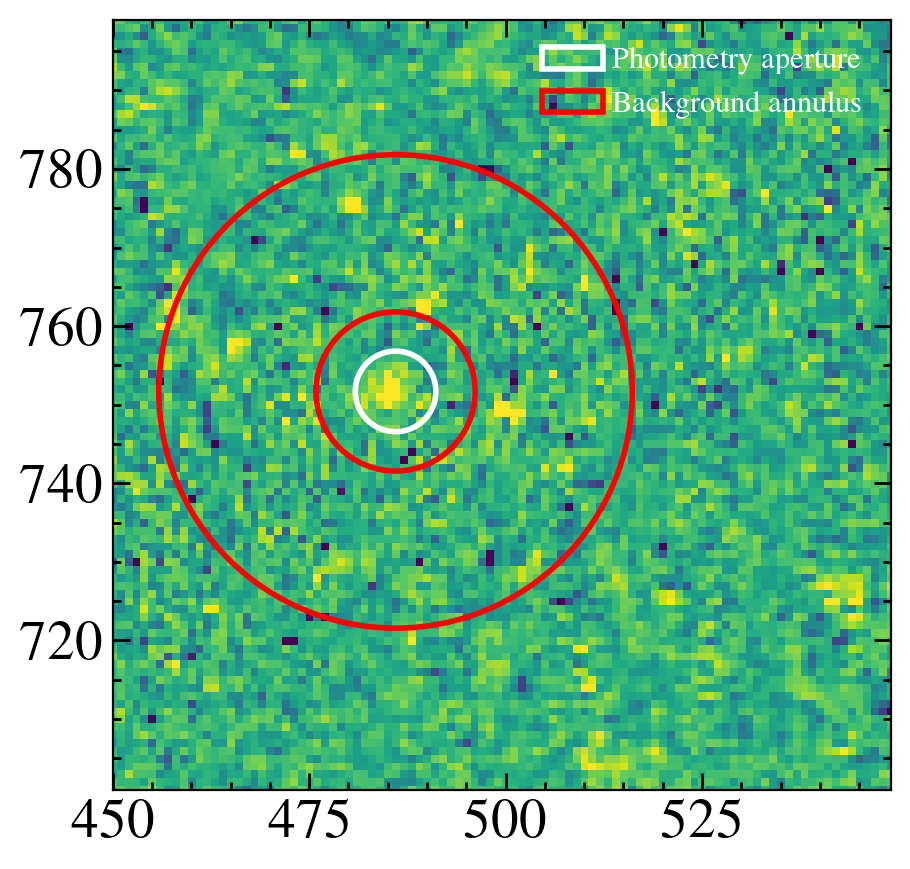

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05041_drc.fits
F225W
1180.0
    aperture_sum   
-------------------
0.49514366972604706
2.908926754612898e-18 1.2216781951302122e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     486   751.7       0.4951          0.02048   0.00739              0.4878


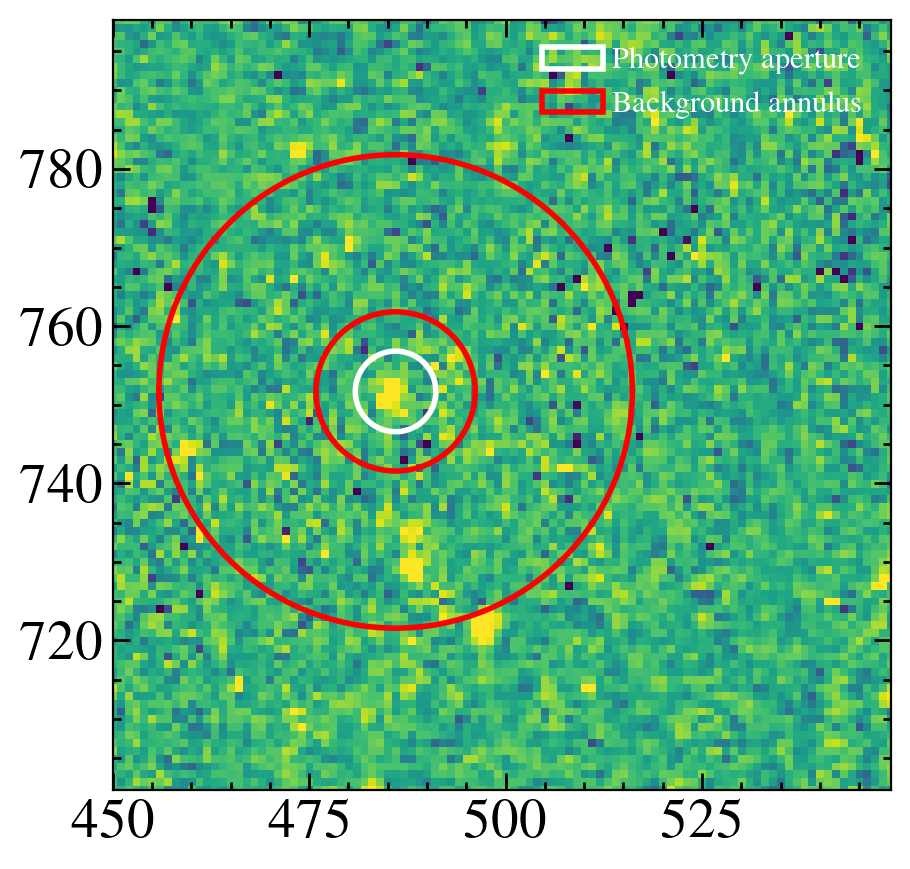

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05051_drc.fits
F225W
1180.0
   aperture_sum  
-----------------
0.388345299849541
2.1587243328122748e-18 1.0819329690652482e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     486   751.7       0.3883          0.01814   0.02638               0.362


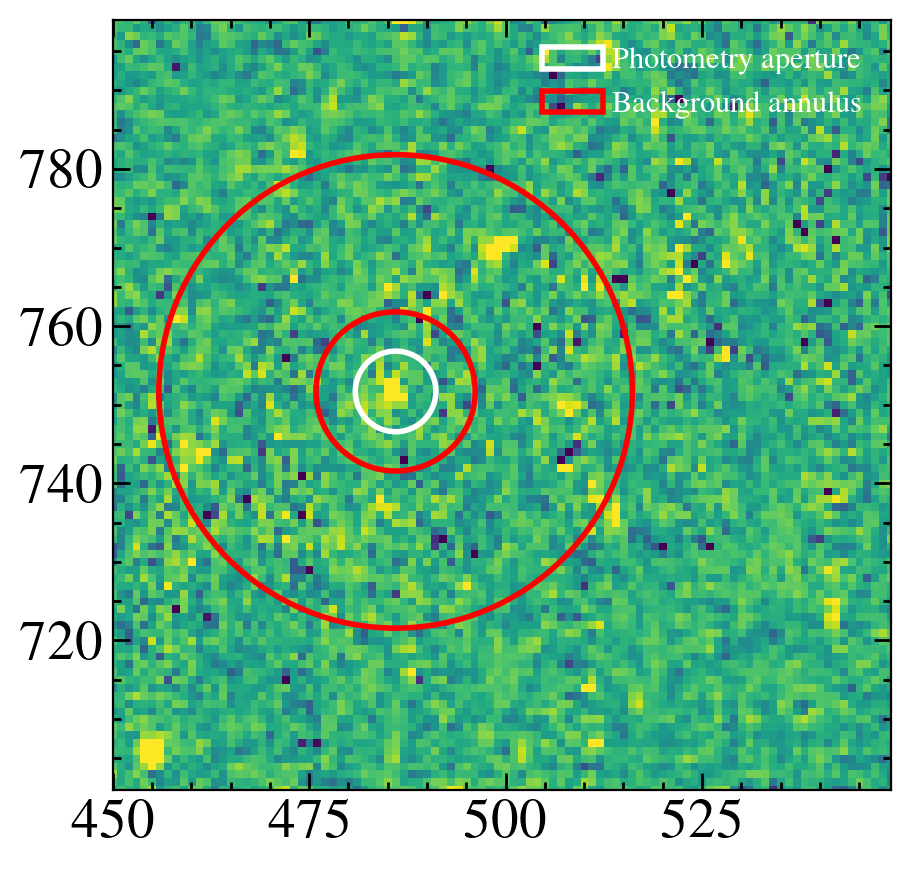

In [64]:
# wfc3_pos = [(489.752, 751.70)] #epoch 1
wfc3_pos = [(486, 751.70)] #epcoh 3
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
drcsort = np.array(drcs)[drcargs]
for drc in drcsort:
    print(drc)
    hdul = fits.open(drc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = np.nan_to_num(data, 0.0)
#     error = hdul[2].data
#     dq = hdul[3].data
#     mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(701, 799)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+25)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
    phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
    phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam /ee
    flux_err = phot_table['aperture_sum_err'][0]* photflam /ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)
    
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_wfc3_drc_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [65]:
eetab = Table.read('{}../wfc3uvis2_aper_007_syn.csv'.format(path))
# eetab

In [66]:
0.4/0.039

10.256410256410257

In [67]:
340e-18*1.5

5.1e-16

In [68]:
mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/'

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
mask = (wn > 2300) & (wn < 3000)
wn, fn, en = wn[mask], fn[mask], en[mask]



['F275W', 'F280N', 'F225W', 'F225W', 'F225W'] [3.5478520126826976e-18, 4.157534382510037e-17, 3.3293364235146428e-18, 2.908926754612898e-18, 2.1587243328122748e-18] [9.093301851973693e-20, 1.3491280285458708e-18, 1.3046027003472668e-19, 1.2216781951302122e-19, 1.0819329690652482e-19] [39.01610296 30.81645548 25.51992589 23.81090836 19.9524776 ]


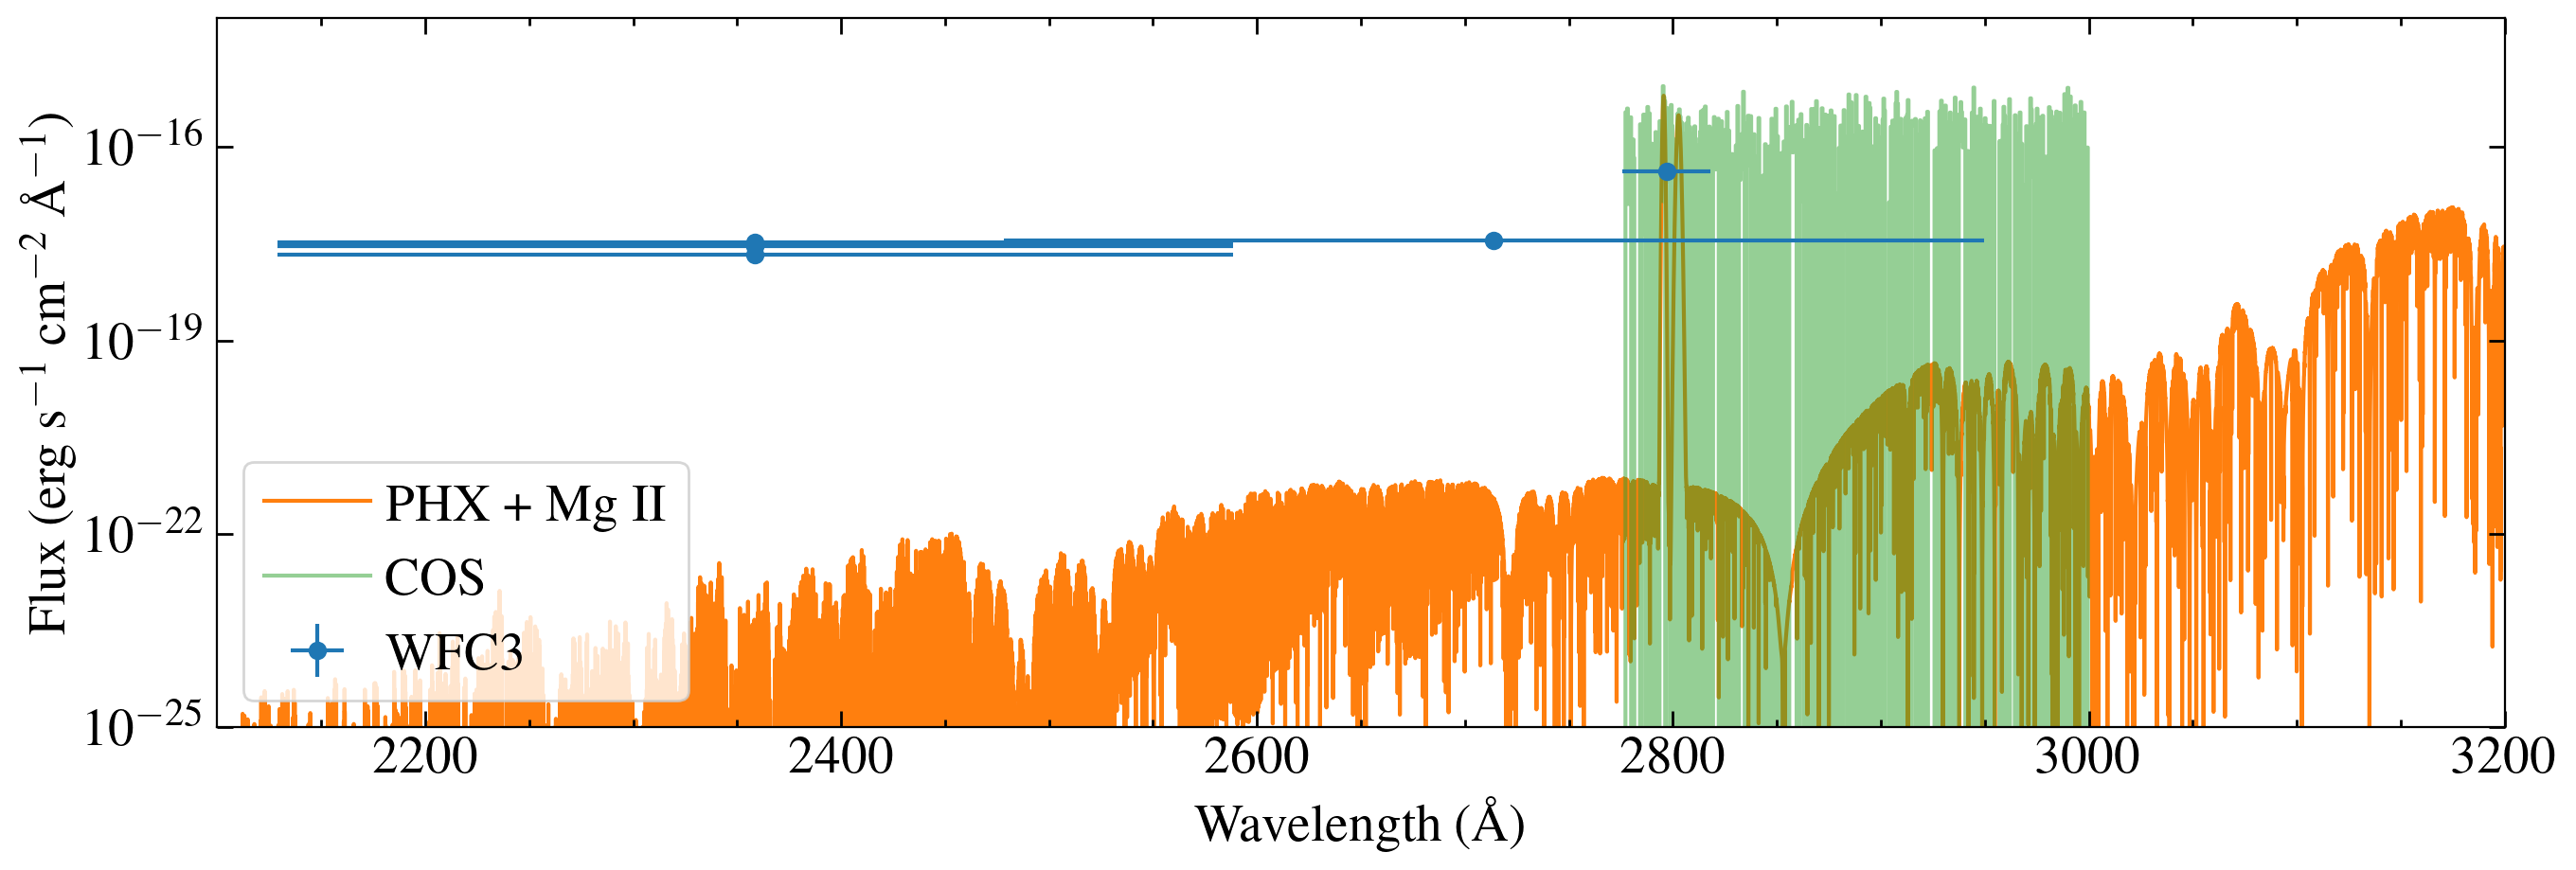

In [69]:
print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])
bands = ['F275W', 'F280N', 'F225W']

fig, ax=plt.subplots()

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='PHX + Mg II')

plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, xerr=widths/2, marker='o', ls='none', label='WFC3', zorder=10, c='C0')
 
ax.legend(frameon=True, loc=3)
    
plt.yscale('log')
plt.ylim(1e-25, 1e-14)
plt.xlim(2100, 3200)

ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()



Need to integrate the model over the fliters so I'm sure it's not just the Mg II lines... pysynphot doesn't work for python 3.10, have to do it by hand.

In [70]:
def make_phot(bp_w, bp_cc, w, f):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
    return np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)

In [71]:
bands= glob.glob('filters/*UVIS*')
bands

['filters/HST_WFC3_UVIS2.F275W.dat',
 'filters/HST_WFC3_UVIS2.F225W.dat',
 'filters/HST_WFC3_UVIS2.F280N.dat']

In [72]:
phot_w = np.array([2713.86, 2358.7, 2796.94])
phot_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, f)
    phot_f.append(phot)
print(phot_f)

[1.791268145160082e-18, 1.5468124773685447e-19, 2.8340546061028076e-17]


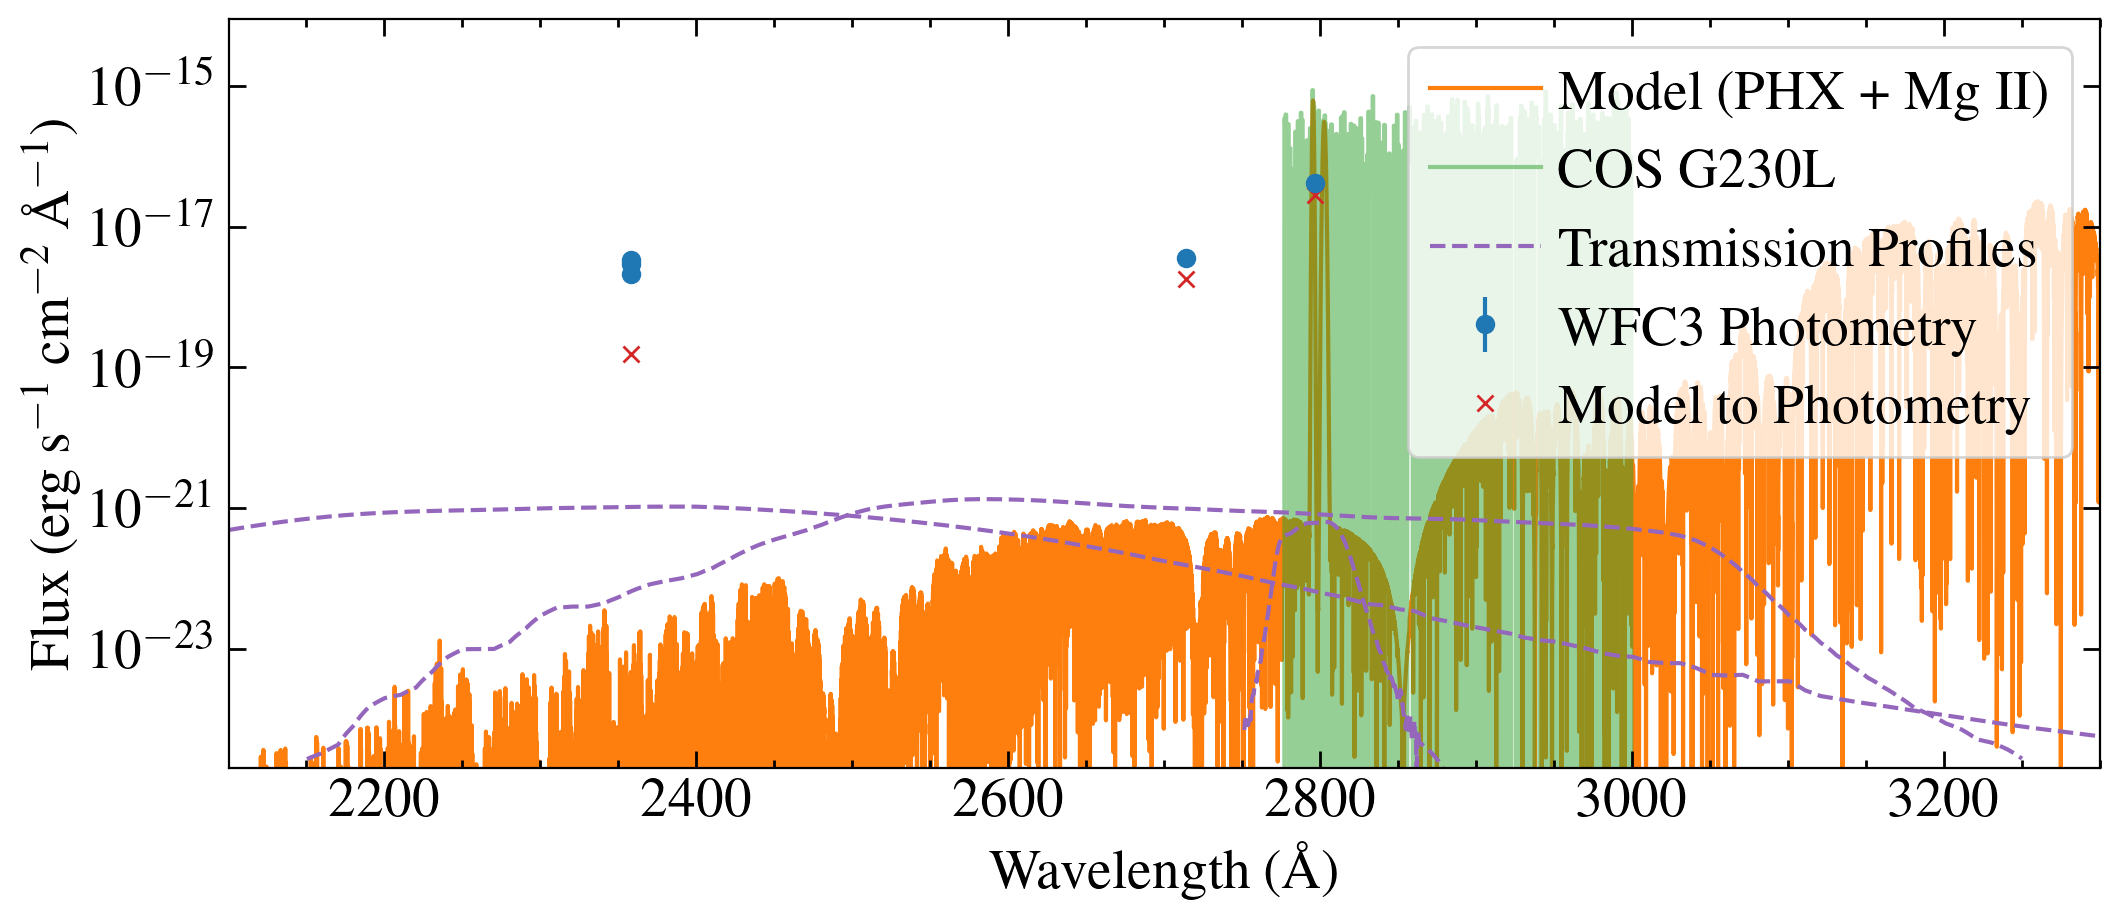

In [73]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])



fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')




plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')



    
# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2101, 3300)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')

Making a simple model to estimate the flux at 2200

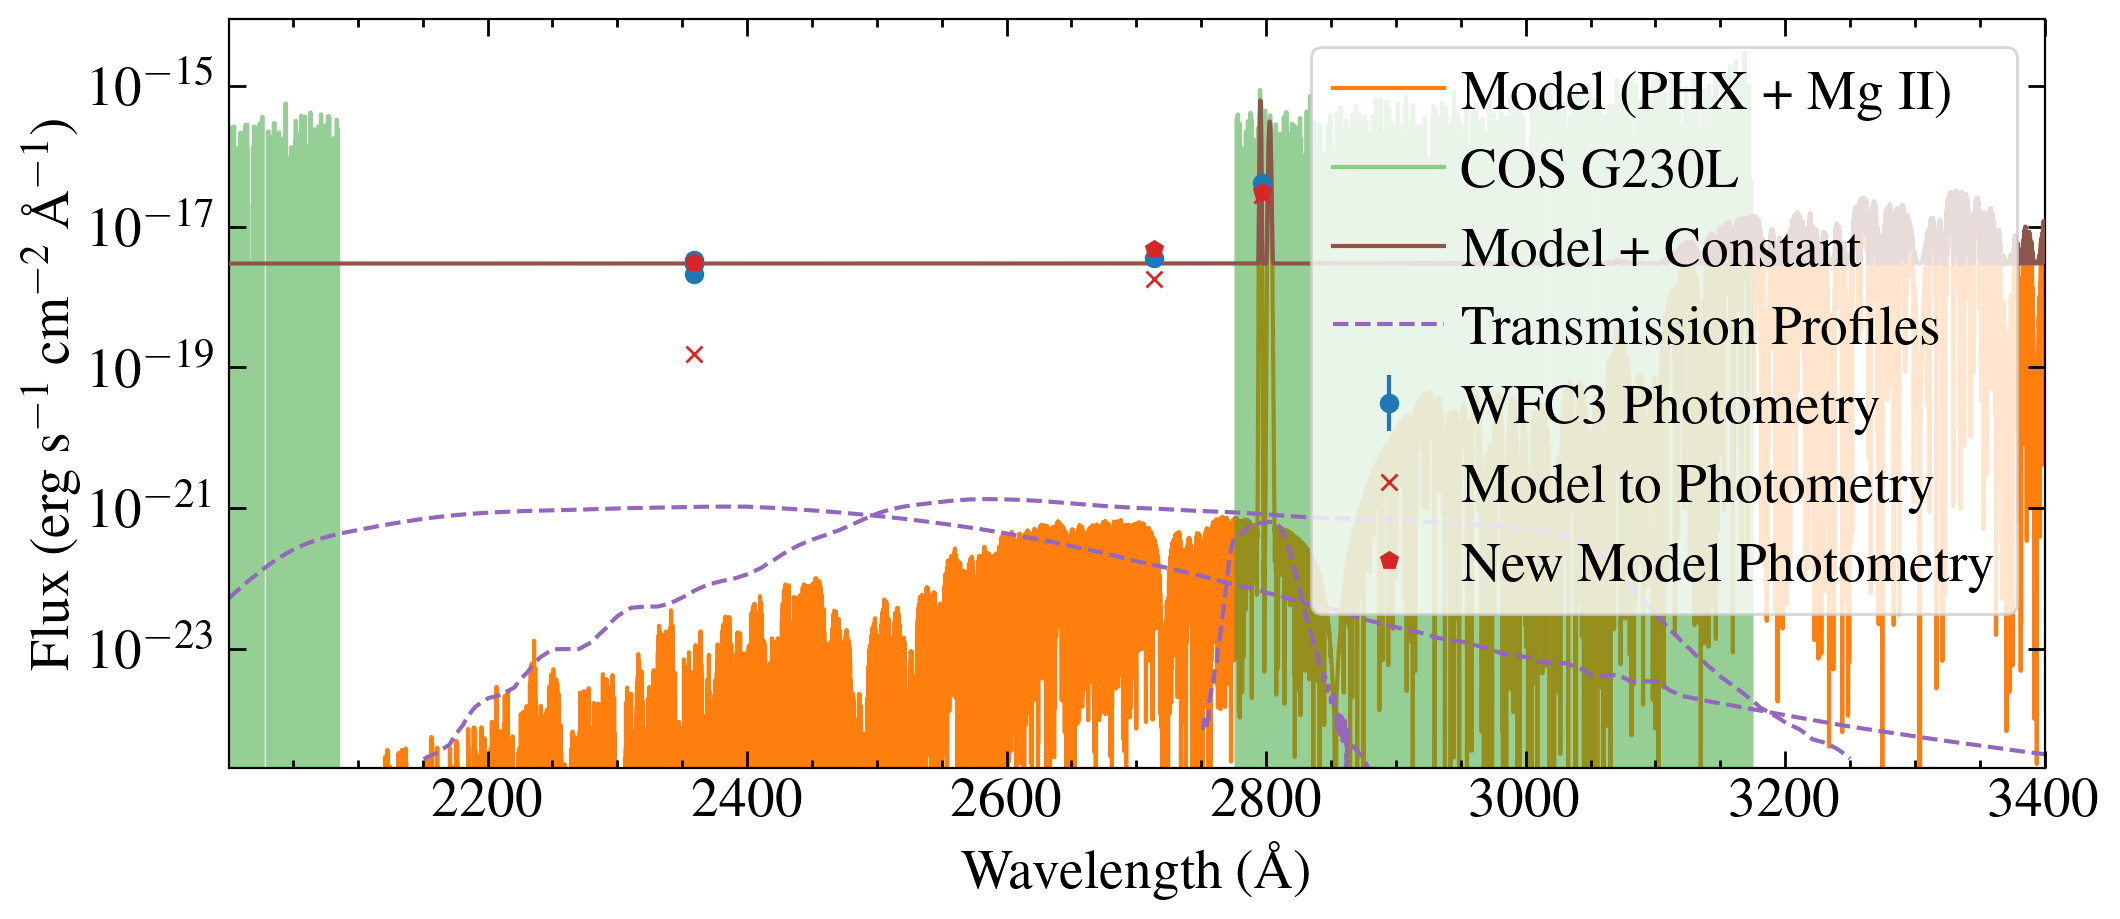

In [74]:
# print(filters, fluxes, flux_errs, np.array(fluxes)/np.array(flux_errs))
# cenwaves = [2713.86, 2796.94, 2358.70, 2358.70 , 2358.70]
# widths = np.array([471.42, 42.16, 459.87 , 459.87 , 459.87 ])



fig, ax=plt.subplots(figsize=(11, 5))

w, f = np.loadtxt('t1uv_model_v2.dat', unpack=True)
plt.plot(w, f, zorder=-1, c='C1', label ='Model (PHX + Mg II)')

nuv = fits.getdata('{}hlsp_muscles_hst_cos_trappist-1_g230l_v10_component-spec.fits'.format(mpath), 1)
wn, fn, en = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR']
# mask = (wn < 3000)
# wn, fn, en = wn[mask], fn[mask], en[mask]


plt.step(wn, fn, alpha =0.5, where='mid', zorder=-1, c='C2', label='COS G230L')
plt.errorbar(cenwaves, fluxes, yerr=flux_errs, marker='o', ls='none', label='WFC3 Photometry', zorder=10, c='C0')
plt.errorbar(phot_w, phot_f, marker='x', ls='none', label='Model to Photometry', zorder=8, c='C3')


#add a line
mod1 = models.Const1D(3e-18)
fmod1 = mod1(w)
nf = f + fmod1
# nf = fmod1

new_mod_f = []
for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    phot = make_phot(bpw, bpf, w, nf)
    new_mod_f.append(phot)

    
plt.plot(w, nf, c='C5', zorder=5, label = 'Model + Constant')
plt.errorbar(phot_w, new_mod_f, marker='p', ls='none', label='New Model Photometry', zorder=11, c='C3',)





# ax.legend(frameon=True, loc=1)
    
plt.yscale('log')
plt.ylim(2e-25, 9e-15)
plt.xlim(2001, 3400)

for band in bands:
    bpw, bpf = np.loadtxt(band, unpack=True)
    ax.plot(bpw, bpf*1e-20, ls ='--', c='C4', label = 'Transmission Profiles')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=1)
    
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

# fig.savefig('plots/t1_wfc3_epoch{}_1stlook.pdf'.format(epoch))
fig.savefig('plots/t1_nuv_constant_model.pdf'.format(epoch))
# fig.savefig('plots/t1_wfc3_epoch{}_1stlook.png'.format(epoch), facecolor='w')




In [75]:
22.5 -  2.5*np.log10(3e-18)

66.30719686320084

Next step - work out the timings/subexposures of the photometry.

In [76]:


mids = (starts + ends) / 2
halfs = (mids - starts)*u.d.to(u.min)
mids0 = (mids-min(starts))*u.d.to(u.min)

<ErrorbarContainer object of 3 artists>

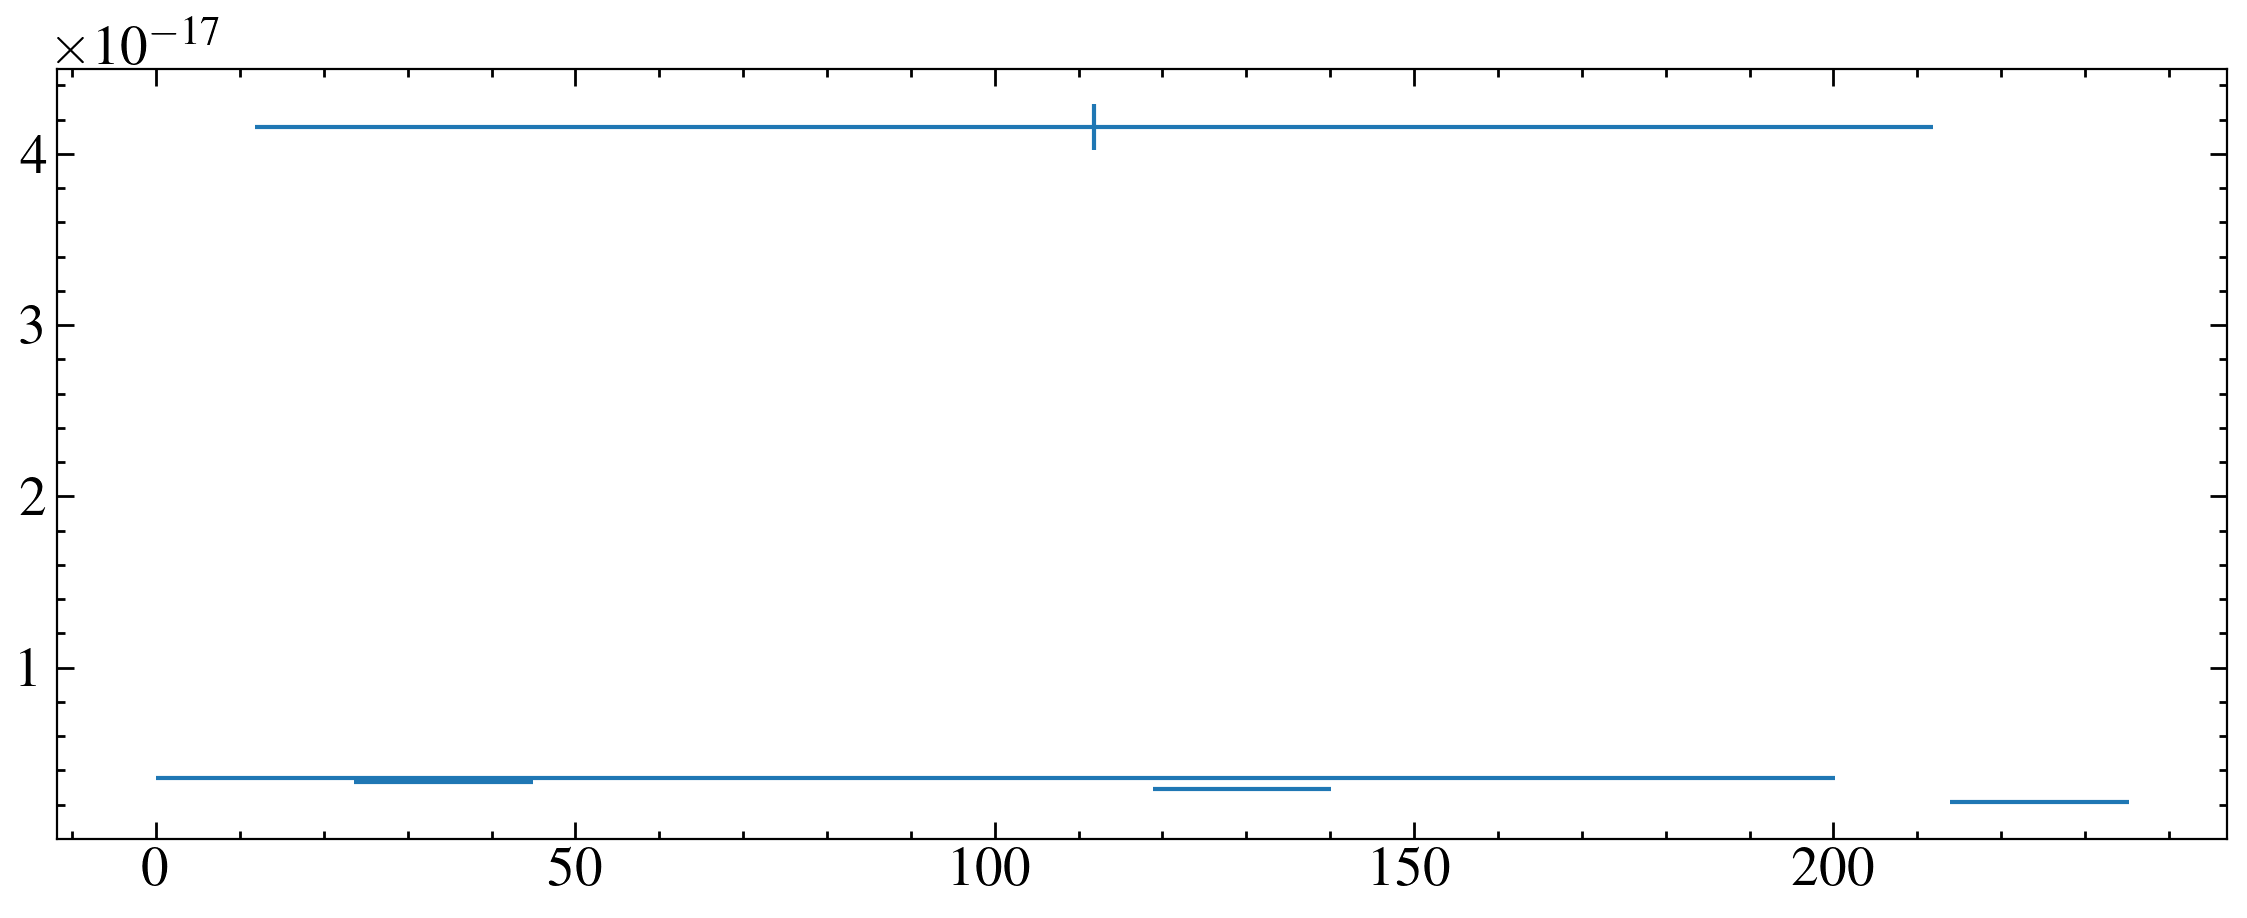

In [77]:
plt.errorbar(mids0, fluxes, yerr=flux_errs, xerr=halfs, ls='none')

All over the place? Look at individual flt images?

In [78]:
flcs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits']

In [79]:
def make_PAMcorr_image_UVIS(data, scihdr, pamdir):
    """
    Corrects the geometric distortion of the input image
    data by multiplying by the correct UVIS PAM.
    Parameters
    ----------
    data : array
        Image data before correction.
    scihdr : header
        Header from science extension of data.
    pamdir : str
        Path to where pixel area maps for UVIS1 and/or
        UVIS2 are located.
    Returns
    -------
    pamcorr_data : array
        PAM-corrected data.
    """

    data = np.copy(data)
    x0 = int(np.abs(scihdr['LTV1']))
    y0 = int(np.abs(scihdr['LTV2']))
    x1 = int(x0 + scihdr['NAXIS1'])
    y1 = int(y0 + scihdr['NAXIS2'])
    

    if scihdr['CCDCHIP'] == 1:
        pam = fits.getdata(pamdir + 'UVIS1wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]

    elif scihdr['CCDCHIP'] == 2:
        pam = fits.getdata(pamdir + 'UVIS2wfc3_map.fits')
        pamcorr_data = data * pam[y0:y1, x0:x1]
    else:
        raise Exception('Chip case not handled.')

    return pamcorr_data

In [80]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flc in flcs:
    hdr = fits.getheader(flc, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flcs)):
    print('{} & WFC3/UVIS & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

if3i05ddq F275W 60135.88636996 590.0
if3i05deq F280N 60135.89455292 590.0
if3i05dfq F225W 60135.9027707 590.0
if3i05dgq F225W 60135.91072181 590.0
if3i05dhq F275W 60135.95250441 590.0
if3i05diq F280N 60135.960687 590.0
if3i05djq F225W 60135.96890478 590.0
if3i05dkq F225W 60135.97685626 590.0
if3i05dpq F275W 60136.01853441 590.0
if3i05dtq F280N 60136.02671737 590.0
if3i05duq F225W 60136.03493478 590.0
if3i05dwq F225W 60136.04288626 590.0
2023-07-10 & WFC3/UVIS & F275W & 60135.88636996 & 590.0 & if3i05ddq & IF3I05010 \\
2023-07-10 & WFC3/UVIS & F280N & 60135.89455292 & 590.0 & if3i05deq & IF3I05020 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.9027707 & 590.0 & if3i05dfq & IF3I05030 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.91072181 & 590.0 & if3i05dgq & IF3I05030 \\
2023-07-10 & WFC3/UVIS & F275W & 60135.95250441 & 590.0 & if3i05dhq & IF3I05010 \\
2023-07-10 & WFC3/UVIS & F280N & 60135.960687 & 590.0 & if3i05diq & IF3I05020 \\
2023-07-10 & WFC3/UVIS & F225W & 60135.96890478 & 590.0 & if3i05

Redoing photometry with flc files 

In [81]:
0.20/0.039

5.128205128205129

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05ddq_flc.fits
F275W
590.0
   aperture_sum   
------------------
380.00389322123965
2.233679315534002e-18 3.282457469300089e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721          380            46.82      61.4               318.6


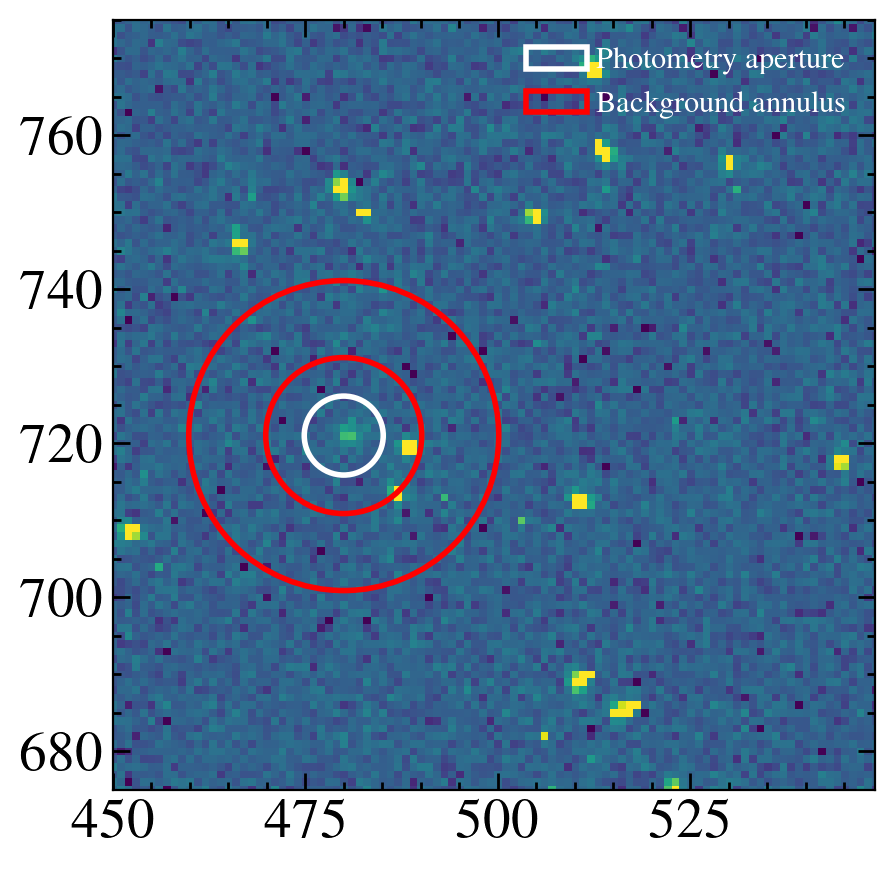

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05deq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
366.8209627803306
4.141116689994808e-17 5.6623987511967384e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        366.8            45.97     30.64               336.2


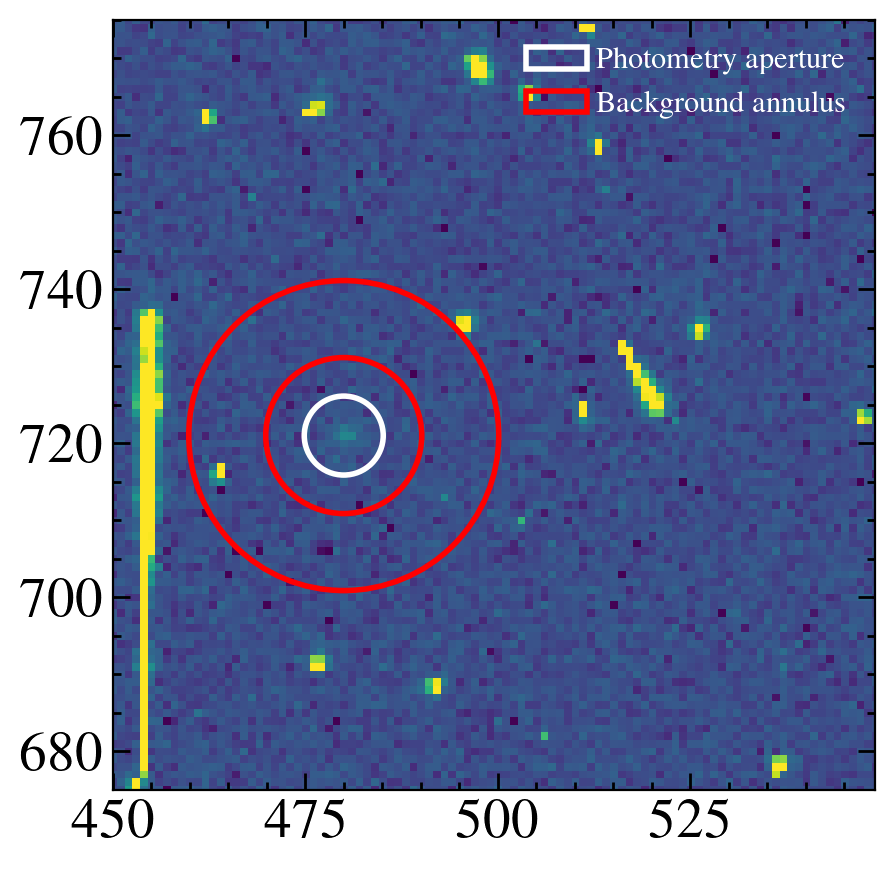

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dfq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
301.7711156612356
2.7207821733911787e-18 4.0251622523773933e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        301.8            39.82     32.61               269.2


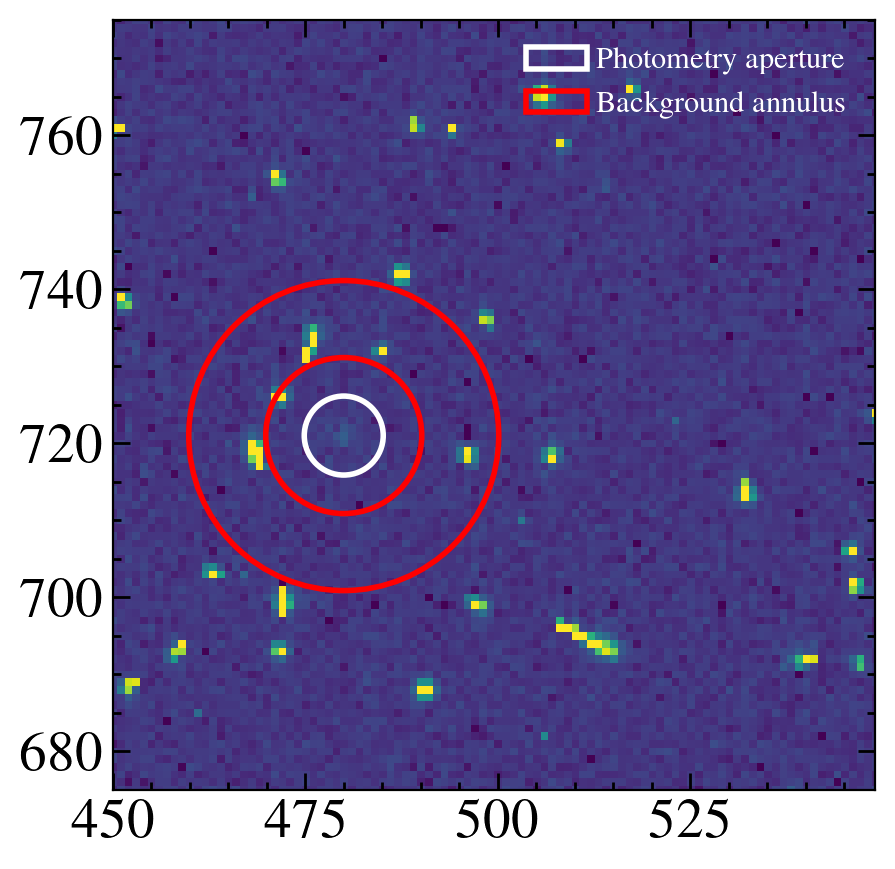

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dgq_flc.fits
F225W
590.0
   aperture_sum   
------------------
295.70490928799444
3.5376264375779555e-18 3.9735245095131403e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        295.7            39.31    -54.27                 350


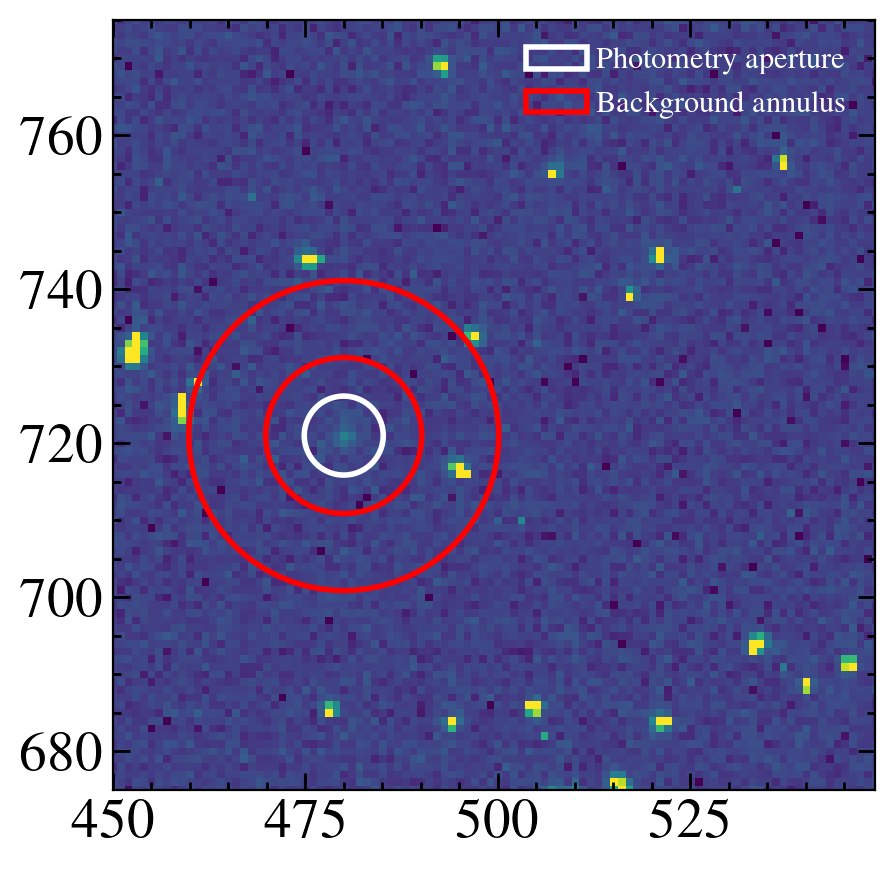

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dhq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
535.5725699669446
3.759755251231496e-18 3.3493051158855783e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        535.6            47.77   -0.7108               536.3


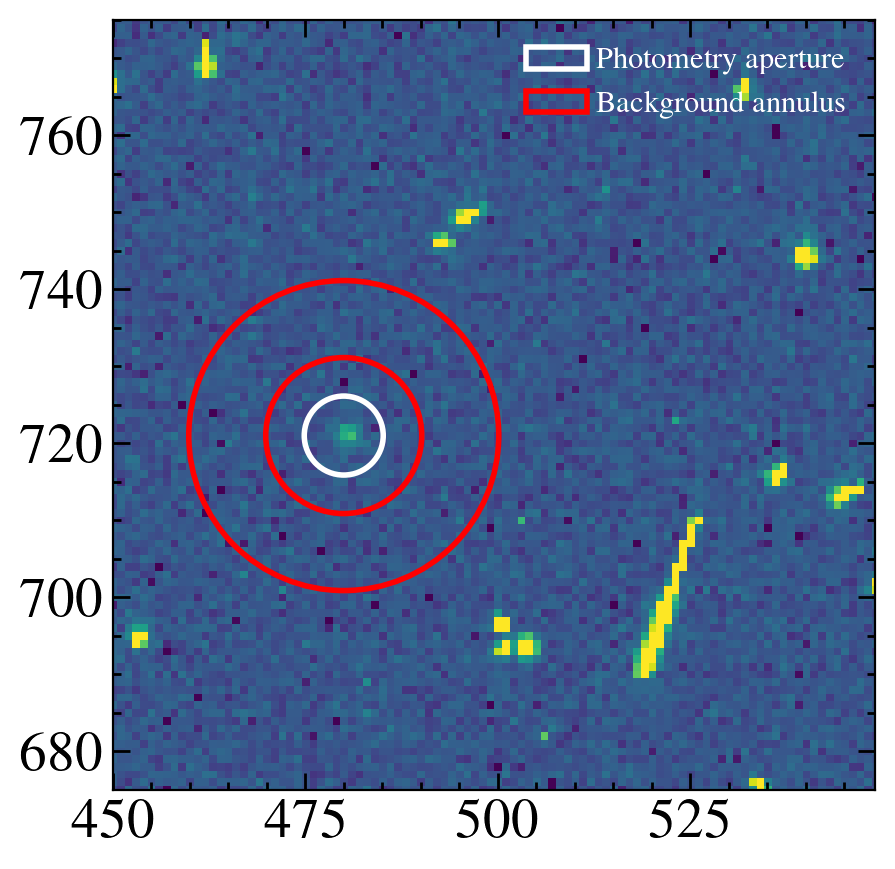

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05diq_flc.fits
F280N
590.0
   aperture_sum   
------------------
281.80724065459896
3.169652375594044e-17 5.537714974958078e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        281.8            44.96     24.49               257.3


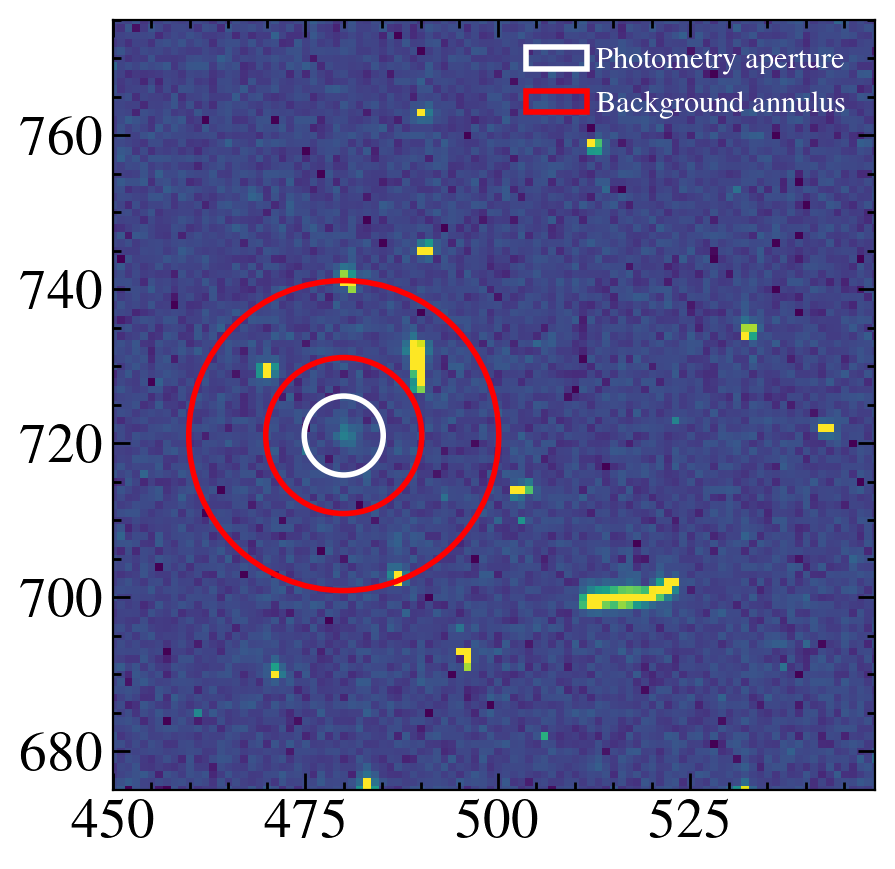

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05djq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
297.0156598000501
2.4327097489711228e-18 3.9586290408607654e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721          297            39.16     56.35               240.7


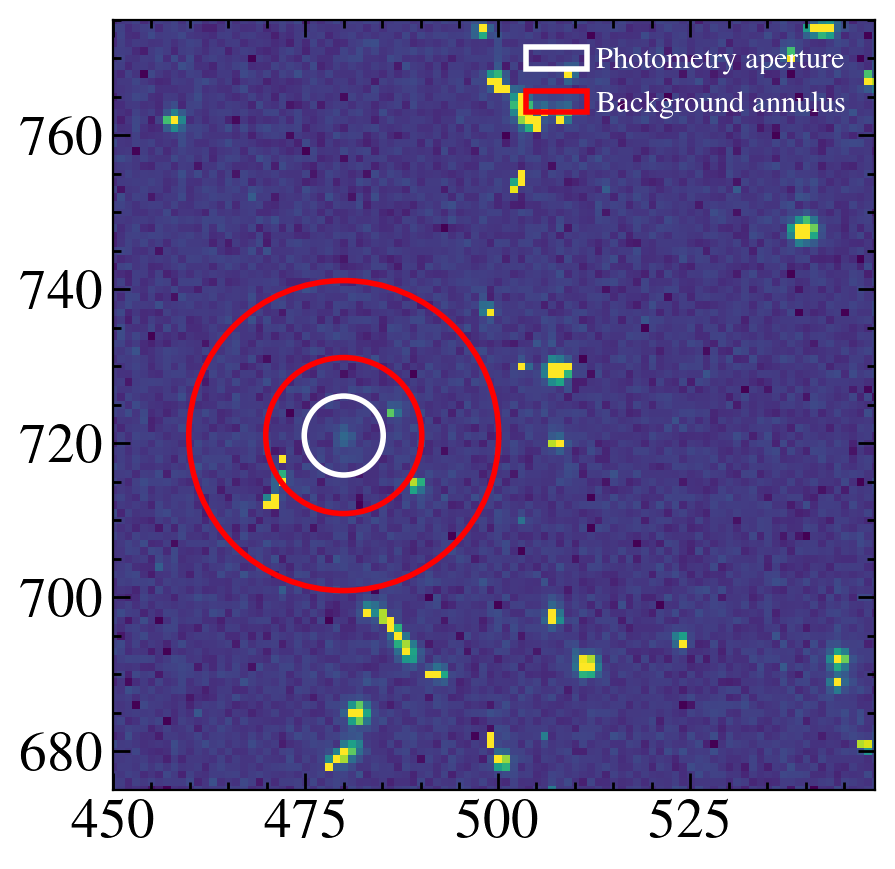

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dkq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
294.7665439236219
3.666293281862103e-18 3.9488203768139906e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        294.8            39.06    -67.93               362.7


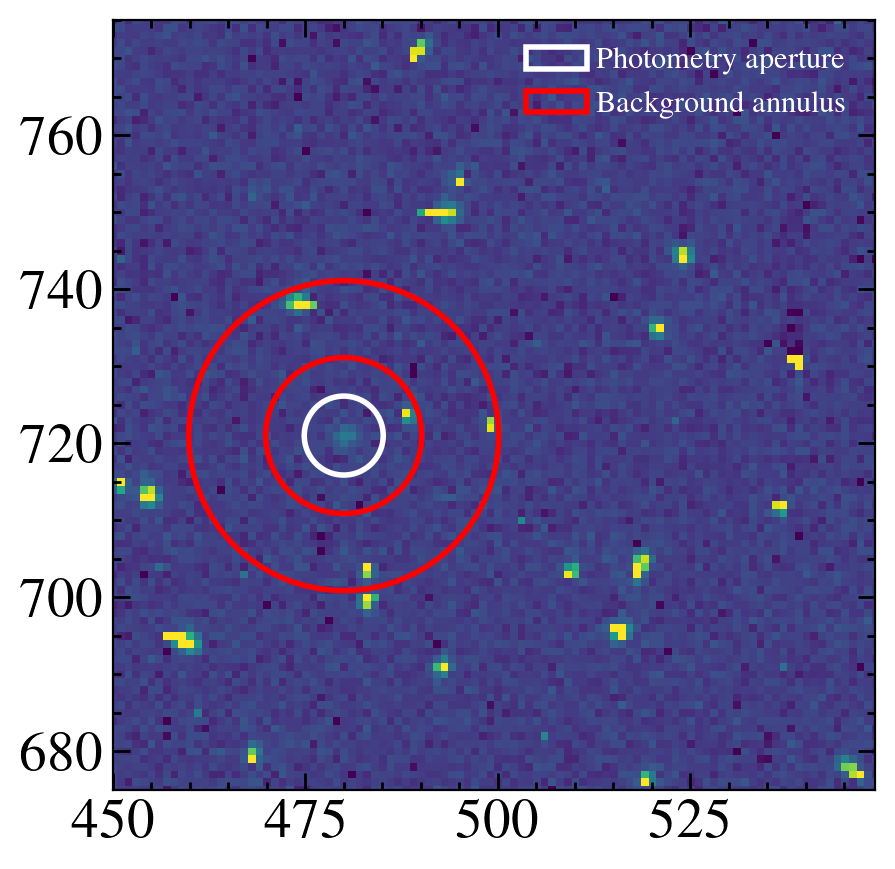

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dpq_flc.fits
F275W
590.0
   aperture_sum  
-----------------
531.9349137079828
3.88544057028747e-18 3.370387076914331e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        531.9            48.07    -22.28               554.2


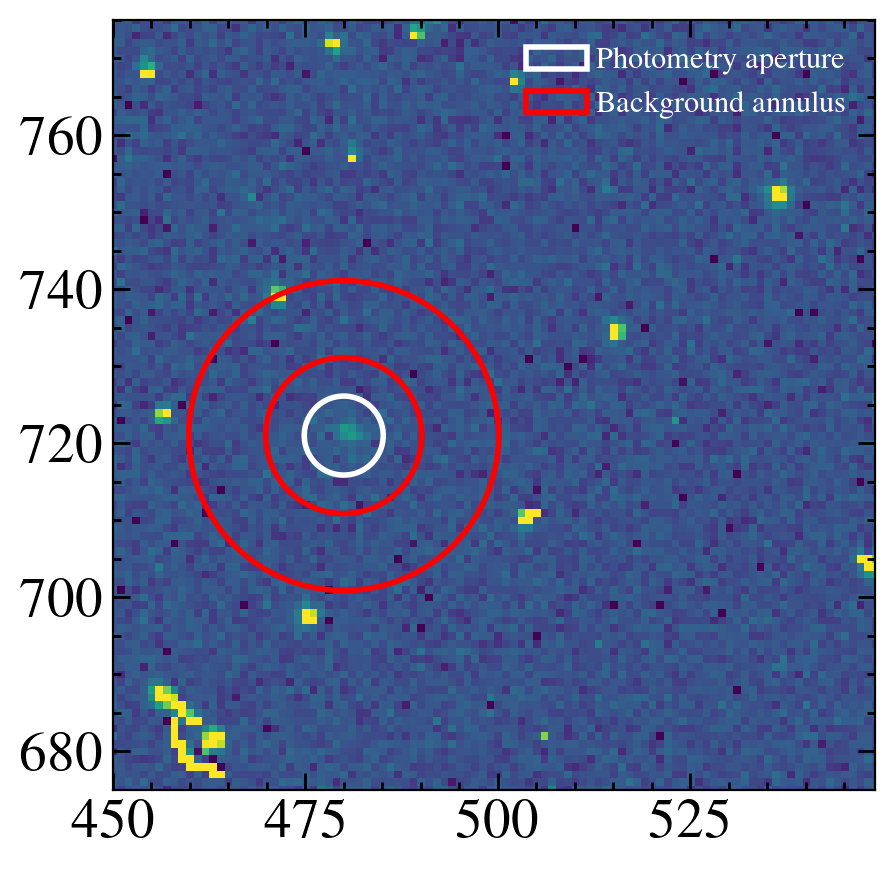

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dtq_flc.fits
F280N
590.0
   aperture_sum  
-----------------
366.0219737080149
3.936602885458977e-17 5.591985318922849e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721          366             45.4     46.44               319.6


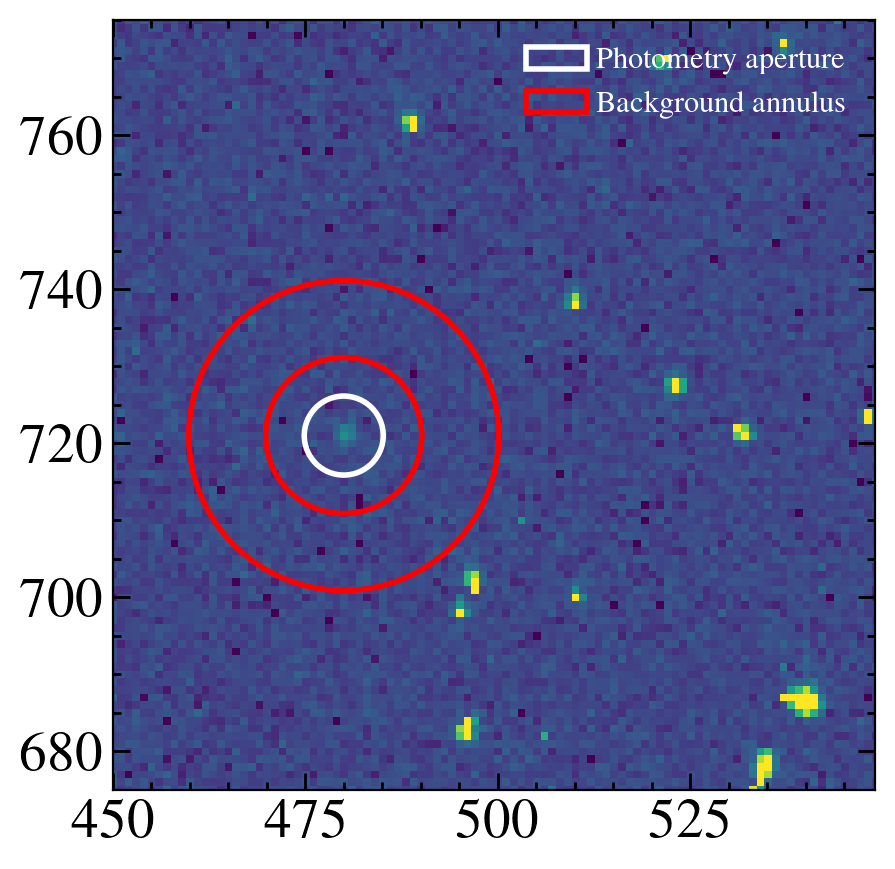

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05duq_flc.fits
F225W
590.0
   aperture_sum  
-----------------
324.4985442088456
2.8983774090984213e-18 4.00932687997767e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        324.5            39.66     37.77               286.7


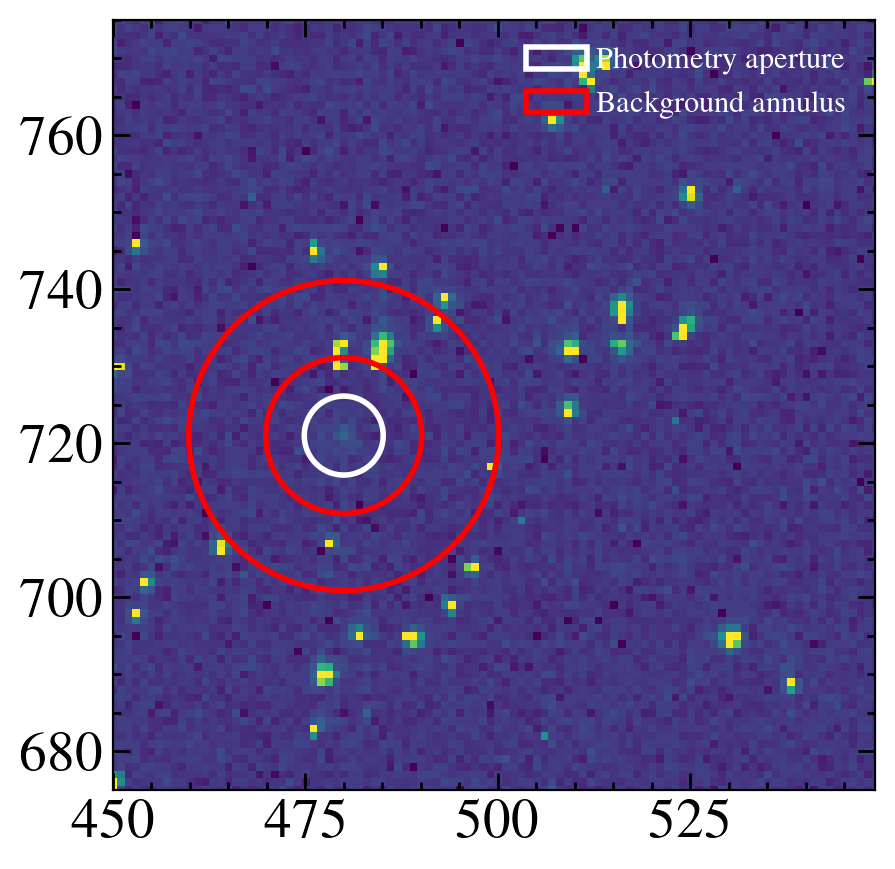

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/wfc3/if3i05dwq_flc.fits
F225W
590.0
   aperture_sum   
------------------
156.19232312260465
1.9155716698584662e-18 3.7987480387565534e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     480     721        156.2            37.58    -33.31               189.5


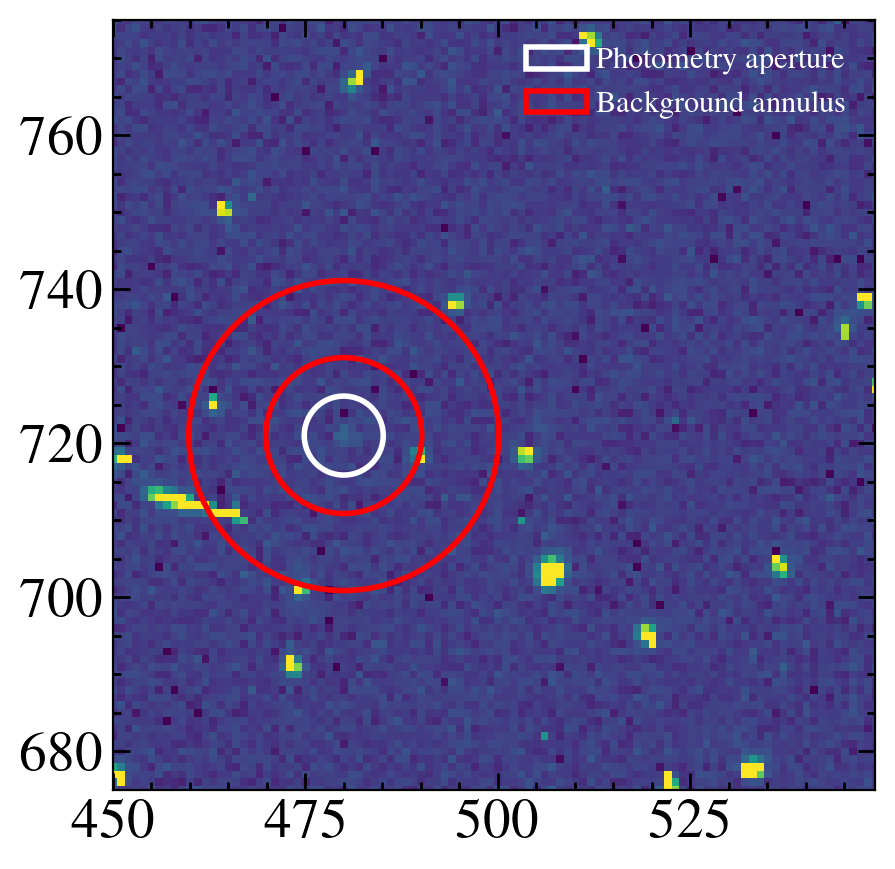

In [82]:
wfc3_pos = [(480, 721)] #epoch 3
# wfc3_pos = [(484, 751.70)] #epoch 3
pixscale = 0.039
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
flcsort = np.array(flcs)[args]
for flc in flcsort:
    print(flc)
    hdul = fits.open(flc)
    filt = hdul[0].header['FILTER'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
    data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = (dq != 0)
#     mask = (data > 20)
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(450, 549)
    plt.ylim(675, 775)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(wfc3_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+5, r_out=ap_pix+15)
    
#     if hdul[0].header['ROOTNAME'].lower() == 'if3i05ddq':
#         print('using the bigger aperture')
#         annulus_aperture = CircularAnnulus(wfc3_pos, r_in=ap_pix+10, r_out=ap_pix+25)
        

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data, mask=mask)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip, mask =mask, error=error)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_wfc3_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

In [83]:
# plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
# plt.y

In [84]:
# filters

Text(0, 0.5, 'Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \\AA$^{-1}$)')

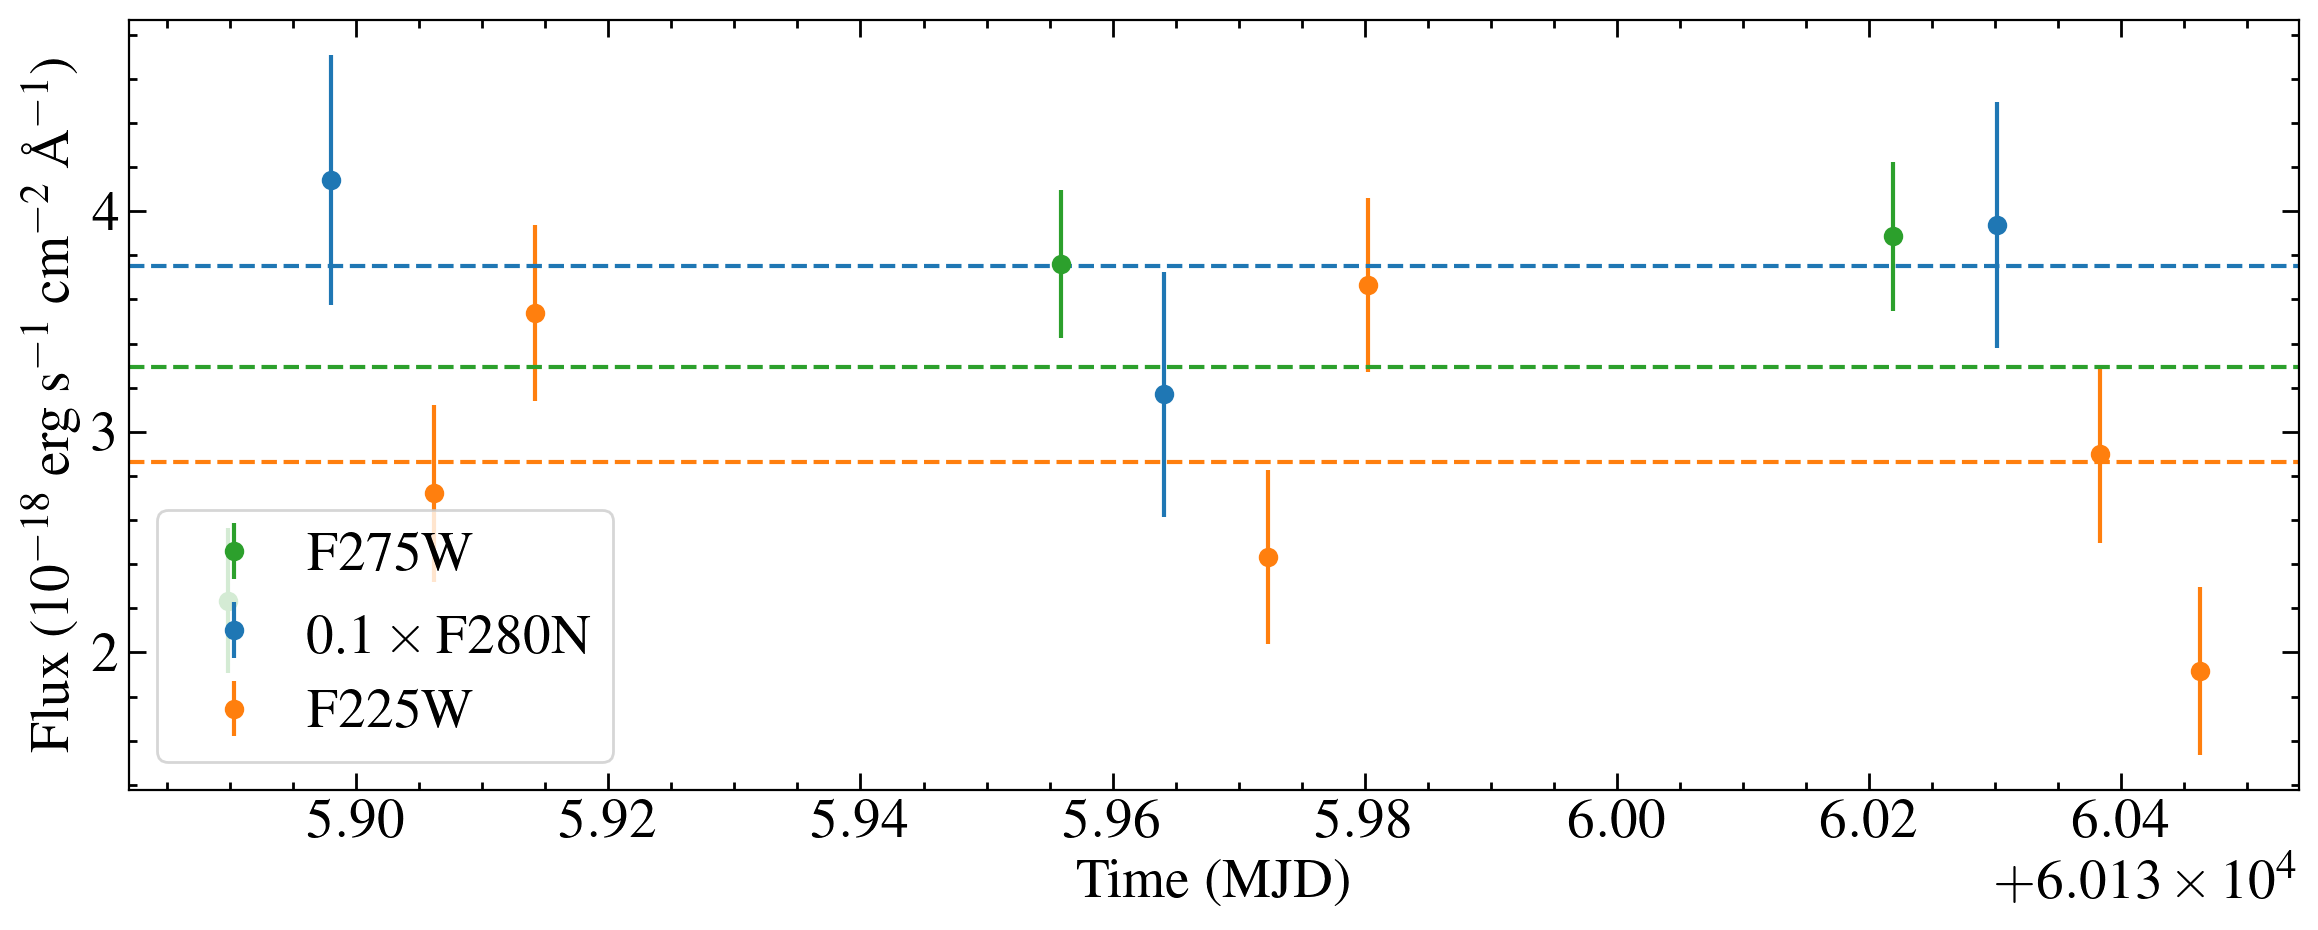

In [85]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, fluxes[i]*1e17, yerr=flux_errs[i]*1e17, ls='none',marker='o', c='C0', label=r'0.1\,$\times$\,F280N')
    elif filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C1', label='F225W')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, fluxes[i]*1e18, yerr=flux_errs[i]*1e18, ls='none',marker='o', c='C2', label='F275W')

plt.axhline(np.mean(f280n), ls='--', c='C0')
plt.axhline(np.mean(f225w), ls='--', c='C1')
plt.axhline(np.mean(f275w), ls='--', c='C2')

# plt.axhline(np.median(f280n), ls='-.', c='C0')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_xlabel('Time (MJD)')
ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

Text(0.5, 0, 'Time (MJD)')

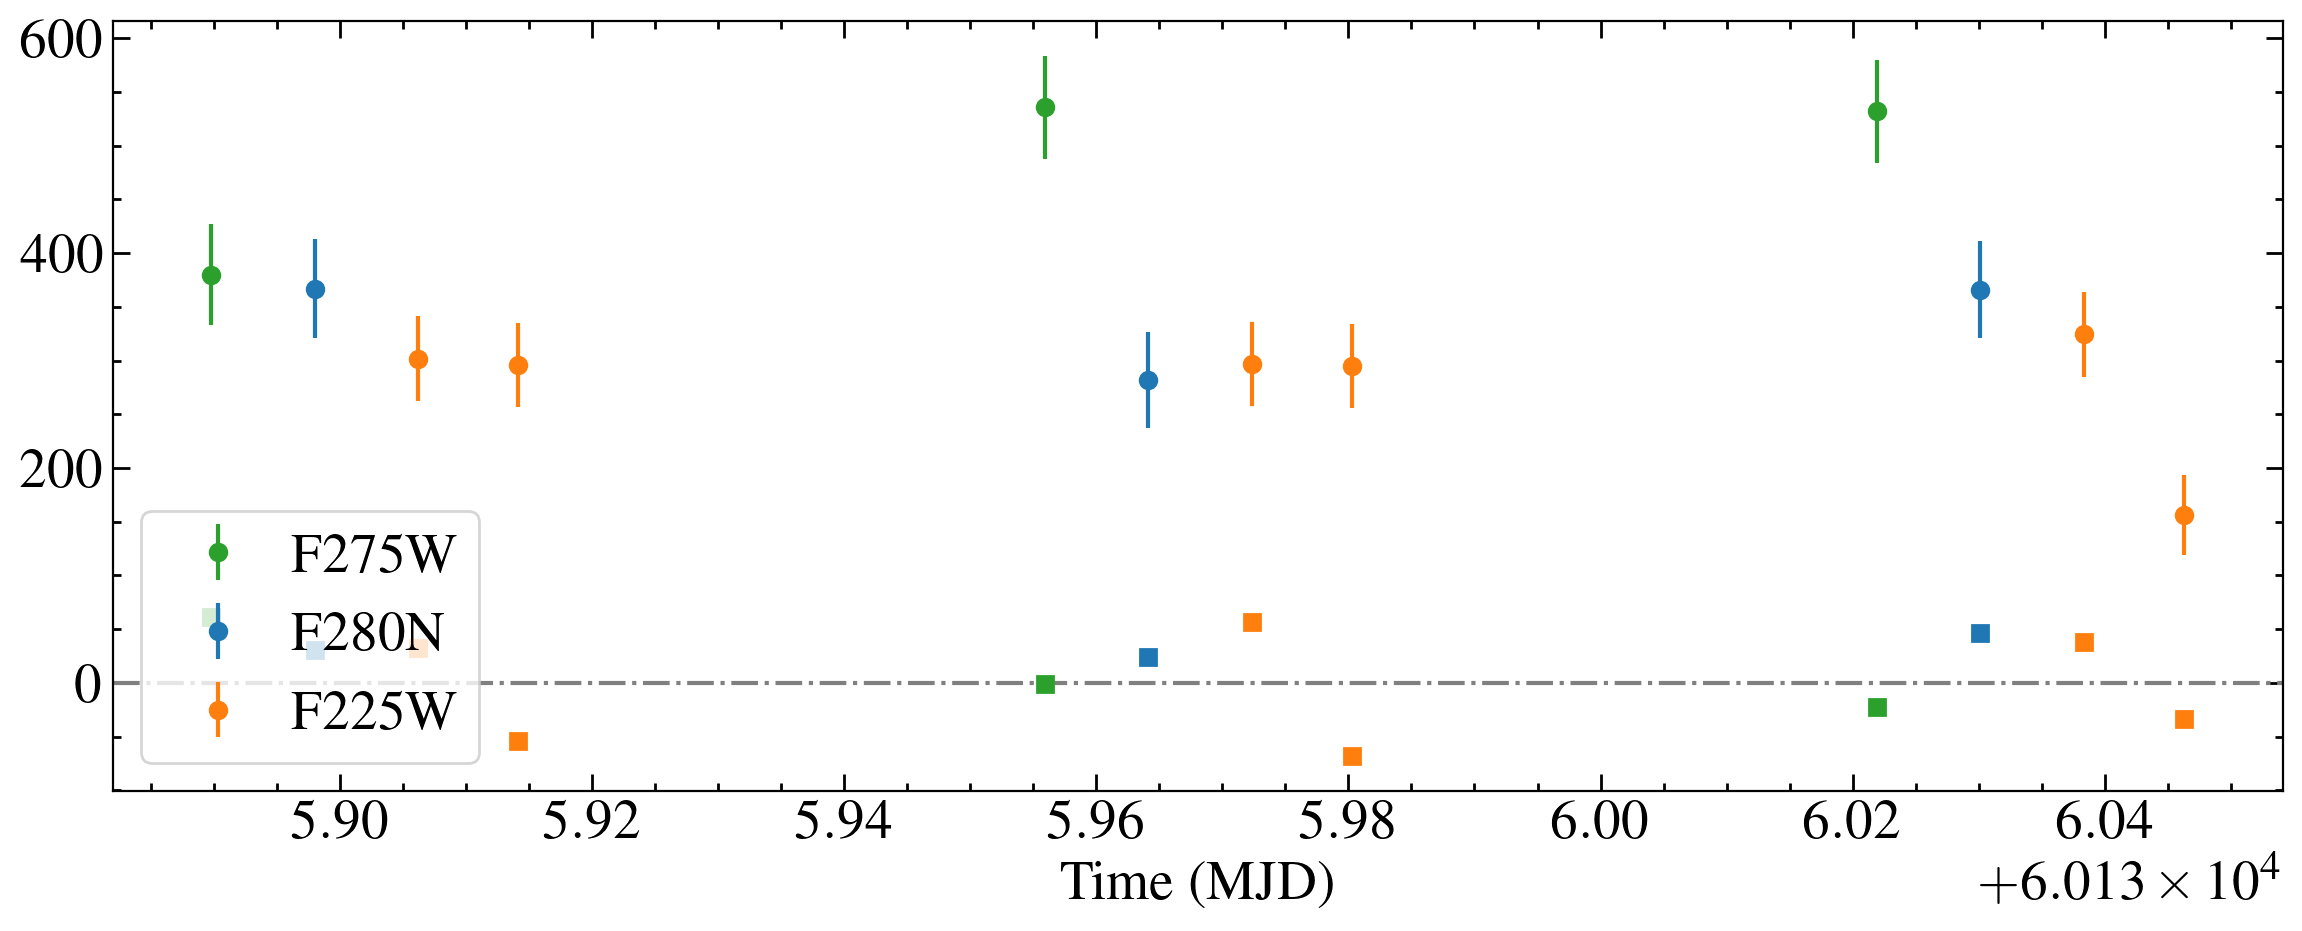

In [86]:
fig, ax=plt.subplots()

f280n = []
f275w = []
f225w= []

for i in range(len(starts)):
    time = starts[i] + ((expt[i]/2)/86400)
    if filters[i] == 'F280N':
        f280n.append(fluxes[i]*1e17)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C0', label=r'F280N')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C0')
    if filters[i] == 'F225W':
        f225w.append(fluxes[i]*1e18)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C1', label='F225W')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C1')
    if filters[i] == 'F275W':
        f275w.append(fluxes[i]*1e18)
        plt.errorbar(time, counts[i]+bkgs[i], yerr=counts_errs[i], ls='none',marker='o', c='C2', label='F275W')
        plt.errorbar(time, bkgs[i], ls='none',marker='s', c='C2')



plt.axhline(0, ls='-.', c='0.5')
# plt.axhline(np.median(f225w), ls='-.', c='C1')
# plt.axhline(np.median(f275w), ls='-.', c='C2')
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=3) 

ax.set_xlabel('Time (MJD)')
# ax.set_ylabel('Flux (10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

In [87]:
for i in range(len(starts)):
    print(filters[i], fluxes[i], flux_errs[i],  fluxes[i]/flux_errs[i])

F275W 2.233679315534002e-18 3.282457469300089e-19 6.804899488949919
F280N 4.141116689994808e-17 5.6623987511967384e-18 7.31336112476994
F225W 2.7207821733911787e-18 4.0251622523773933e-19 6.75943478249652
F225W 3.5376264375779555e-18 3.9735245095131403e-19 8.902993876364453
F275W 3.759755251231496e-18 3.3493051158855783e-19 11.225478483280531
F280N 3.169652375594044e-17 5.537714974958078e-18 5.723754996288951
F225W 2.4327097489711228e-18 3.9586290408607654e-19 6.145333962492615
F225W 3.666293281862103e-18 3.9488203768139906e-19 9.284527864040658
F275W 3.88544057028747e-18 3.370387076914331e-19 11.528173119642632
F280N 3.936602885458977e-17 5.591985318922849e-18 7.039723212680505
F225W 2.8983774090984213e-18 4.00932687997767e-19 7.229087315311552
F225W 1.9155716698584662e-18 3.7987480387565534e-19 5.042639444140368


In [88]:
np.array(fluxes)/flux_errs

array([ 6.80489949,  7.31336112,  6.75943478,  8.90299388, 11.22547848,
        5.723755  ,  6.14533396,  9.28452786, 11.52817312,  7.03972321,
        7.22908732,  5.04263944])

In [89]:
300*u.ks.to(u.d)

3.472222222222222

I should really try to look at ACS...

In [90]:
apath

'/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/'

In [91]:
drzs = glob.glob('{}*drz.fits'.format(apath))
drzs

['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06011_drz.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06021_drz.fits']

In [92]:
roots = []
bands = []
times = []
expt = []
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
roots, bands, times, expt = np.array(roots), np.array(bands), np.array(times), np.array(expt)    
args = np.argsort(times)
roots, bands, times, expt = roots[args], bands[args], times[args], expt[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

jf3i06011 F150LP 60136.81131282 2600.0
jf3i06021 F165LP 60136.87722764 2600.0


[None, None]

In [93]:
flts = glob.glob('{}*flt.fits'.format(apath))
flts


['/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hvq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hwq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hxq_flt.fits',
 '/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hyq_flt.fits']

In [94]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for flt in flts:
    hdr = fits.getheader(flt, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ASN_ID'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(flts)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i06hvq F150LP 60136.81131282 1300.0
jf3i06hwq F150LP 60136.82682208 1300.0
jf3i06hxq F165LP 60136.87722764 1300.0
jf3i06hyq F165LP 60136.89273727 1300.0
2023-07-11 & ACS/SBC & F150LP & 60136.81131282 & 1300.0 & jf3i06hvq & JF3I06010 \\
2023-07-11 & ACS/SBC & F150LP & 60136.82682208 & 1300.0 & jf3i06hwq & JF3I06010 \\
2023-07-11 & ACS/SBC & F165LP & 60136.87722764 & 1300.0 & jf3i06hxq & JF3I06020 \\
2023-07-11 & ACS/SBC & F165LP & 60136.89273727 & 1300.0 & jf3i06hyq & JF3I06020 \\


/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hvq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
24.89538025856018
1.0397528459958266e-18 5.968134655599049e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660         24.9            14.29         0                24.9


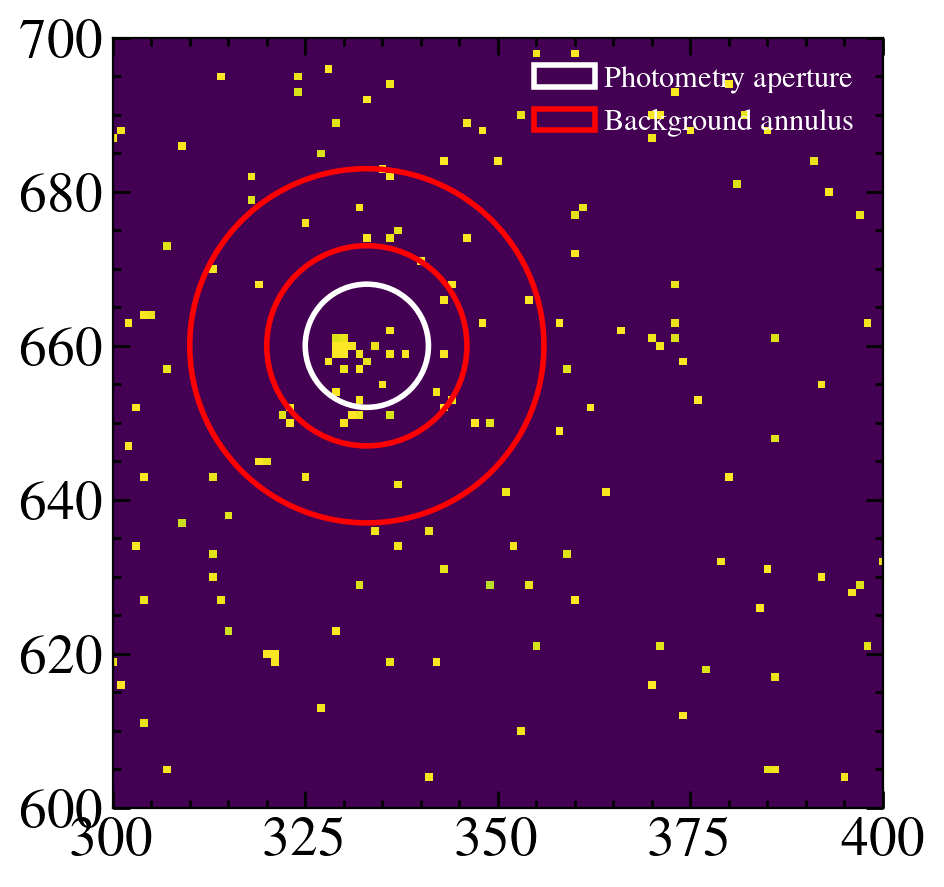

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hwq_flt.fits
F150LP
1300.0
   aperture_sum  
-----------------
29.51359978178776
1.2326322815713599e-18 6.016144536419135e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        29.51             14.4         0               29.51


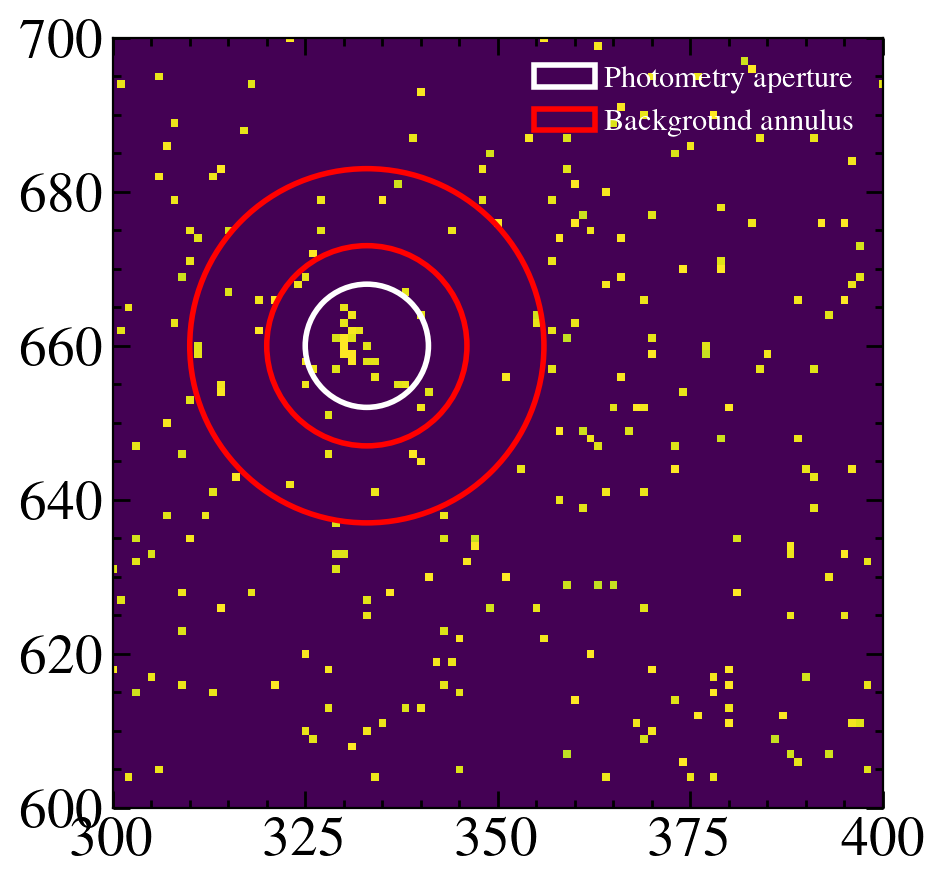

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hxq_flt.fits
F165LP
1300.0
   aperture_sum  
-----------------
6.612265212345163
9.43059731976266e-19 2.00365045832498e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        6.612            14.05         0               6.612


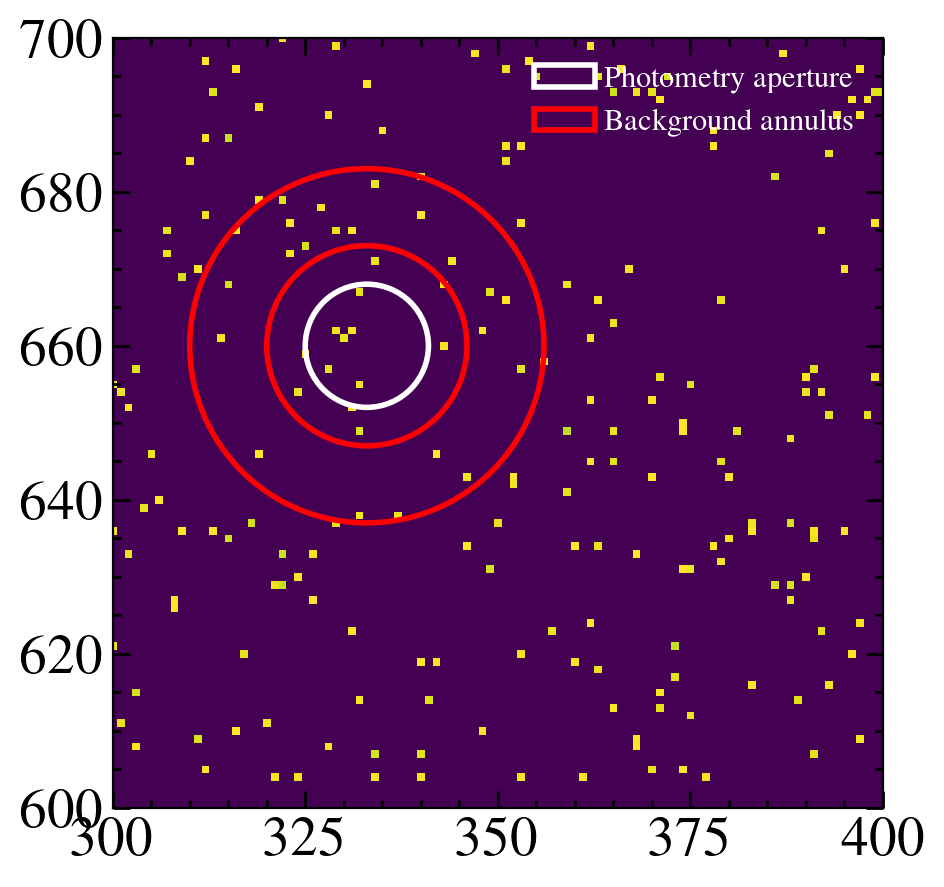

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06hyq_flt.fits
F165LP
1300.0
   aperture_sum   
------------------
13.209915368403829
1.88403502380657e-18 2.0134485086816864e-18
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     333     660        13.21            14.12         0               13.21


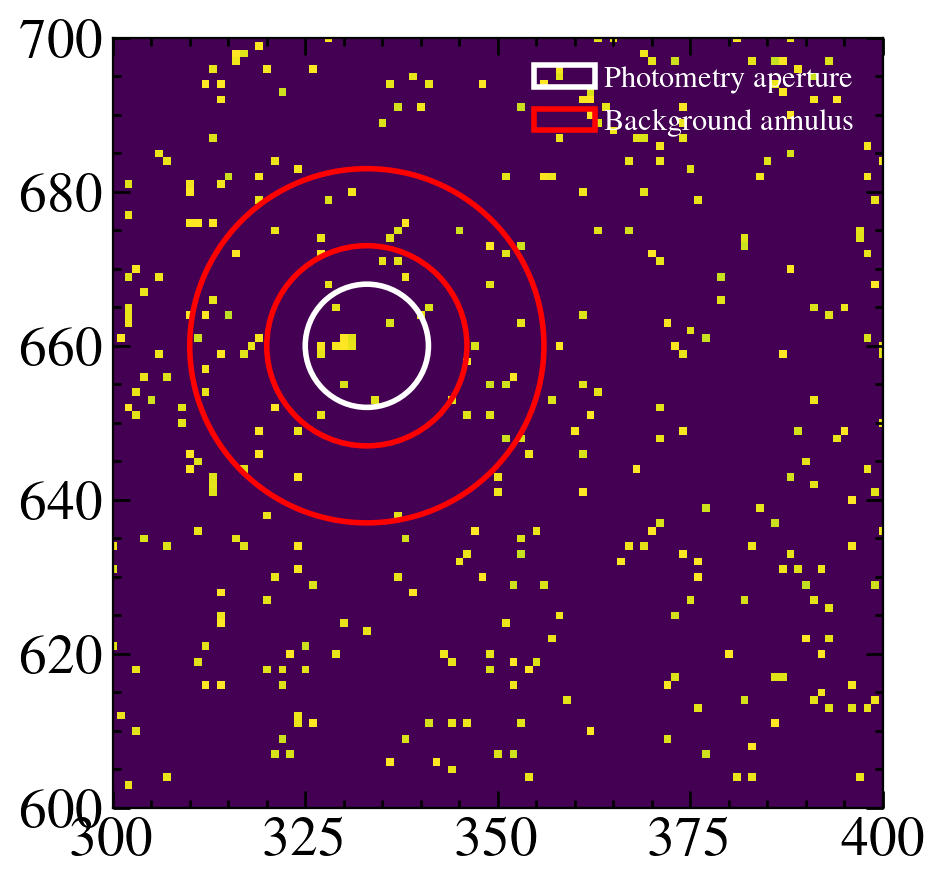

In [95]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(333, 660)]
pixscale = 0.025
ap_arc = '0.20' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
fltsort = np.array(flts)[args]
for flt in fltsort:
    print(flt)
    hdul = fits.open(flt)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
    mask = dq != 0
#     error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(300, 400)
    plt.ylim(600, 700)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    total_bkg = bkg_stats.median * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
#     ee = eetab['APER#{}'.format(ap_arc)][eetab['FILTER'] == filt][0]
    ee = 0.65
#     print(ee[0])
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / (ee *exptime)
    flux_err = phot_table['aperture_sum_err'][0]* photflam / (ee *exptime)
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)

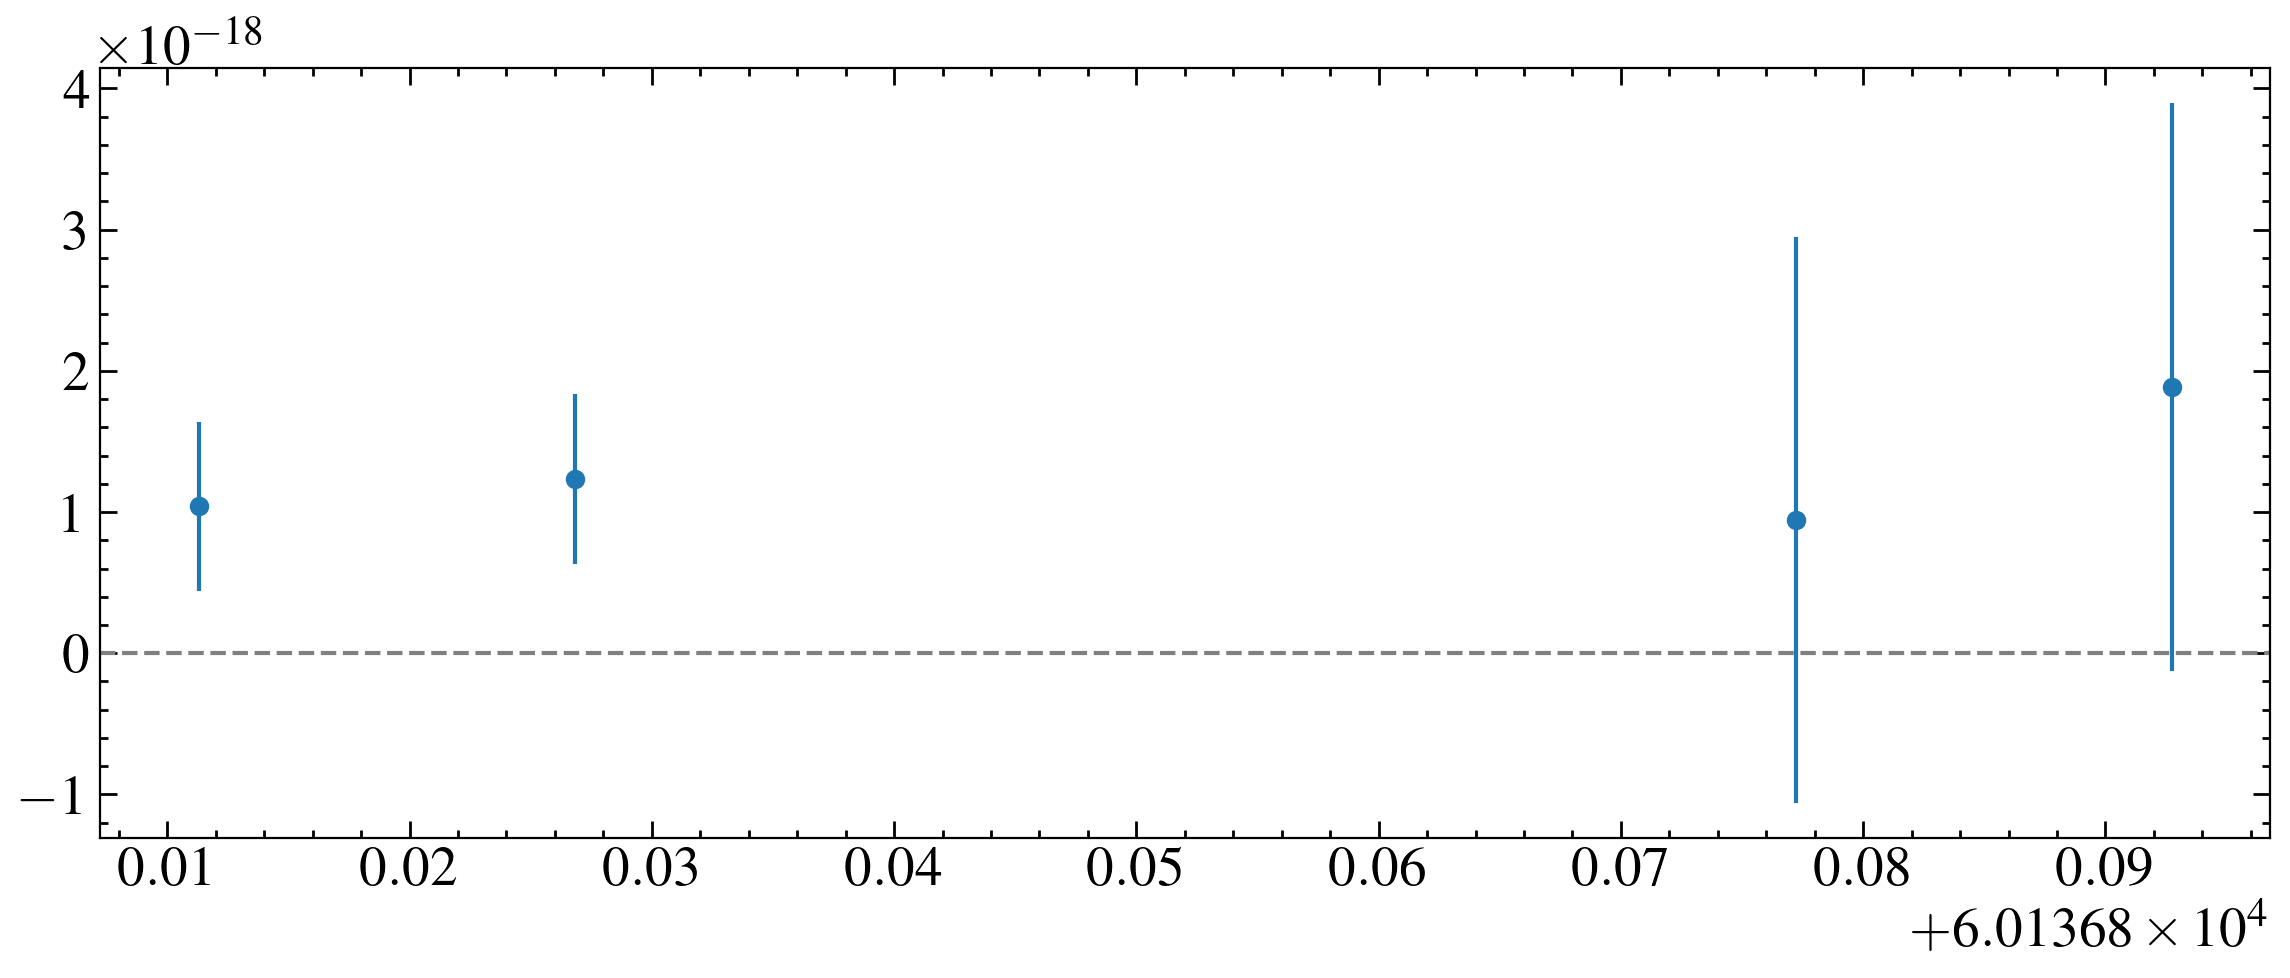

In [96]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

Ok so we use the drz images...

In [101]:
roots = []
bands = []
times = []
expt = []
dates = []
starts = []
datasets = [] 
for drz in drzs:
    hdr = fits.getheader(drz, 0)
    roots.append(hdr['ROOTNAME'])
    bands.append(hdr['FILTER1'])
    times.append(hdr['EXPSTART'])
    expt.append(hdr['EXPTIME'])
    dates.append(hdr['DATE-OBS'])
    datasets.append(hdr['ROOTNAME'])
roots, bands, times, expt,  dates, datasets = np.array(roots), np.array(bands), np.array(times), np.array(expt), np.array(dates), np.array(datasets)    
args = np.argsort(times)
roots, bands, times, expt, dates, datasets = roots[args], bands[args], times[args], expt[args], dates[args], datasets[args] 

[print(r, b, t ,e) for r, b, t, e in zip(roots, bands, times, expt)]

#    Date & Instrument & Filter & Start Time (MJD) & Exposure Time (s) & Exposure Name & Dataset \\ 

for i in range(len(drzs)):
    print('{} & ACS/SBC & {} & {} & {} & {} & {} \\\\'.format(dates[i], bands[i], times[i], expt[i], roots[i], datasets[i]))

jf3i06011 F150LP 60136.81131282 2600.0
jf3i06021 F165LP 60136.87722764 2600.0
2023-07-11 & ACS/SBC & F150LP & 60136.81131282 & 2600.0 & jf3i06011 & jf3i06011 \\
2023-07-11 & ACS/SBC & F165LP & 60136.87722764 & 2600.0 & jf3i06021 & jf3i06021 \\


11.999999999999998
/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06011_drz.fits
F150LP
2600.0
    aperture_sum   
-------------------
0.03811026963366871
1.5279731636416218e-18 1.8897152213395699e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830      0.03811         0.003829  0.007154             0.03096


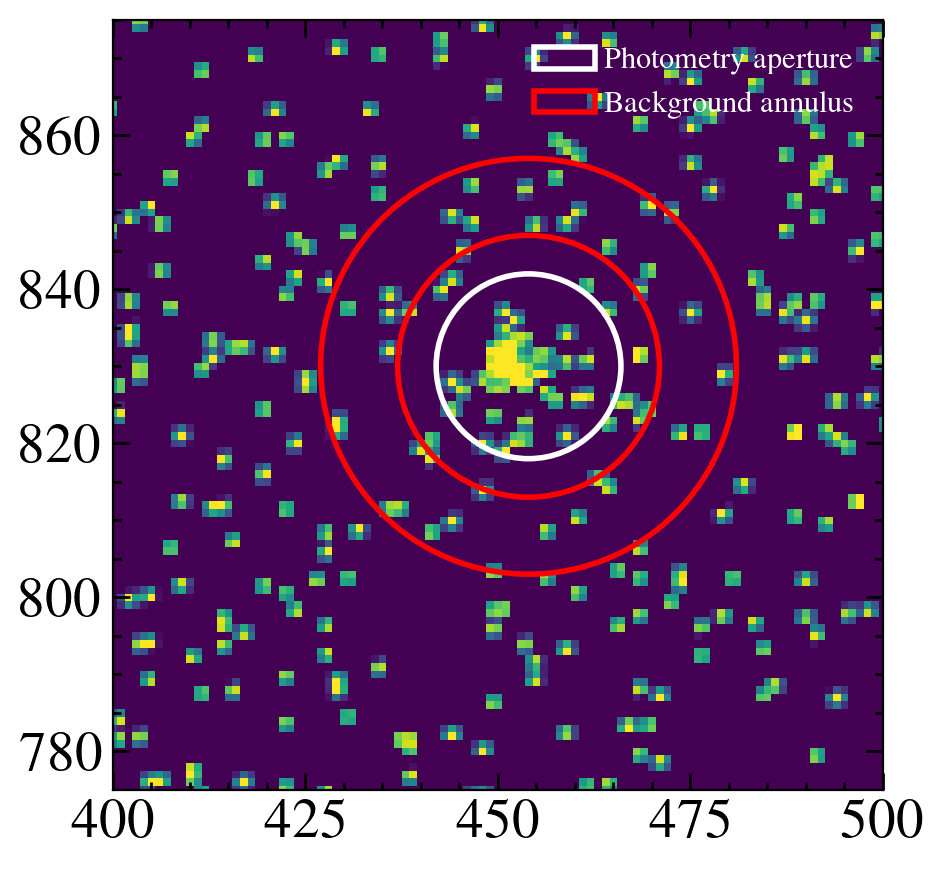

/media/david/2tb_ext_hd/hddata/trappist-1_phot/epoch3/acs/jf3i06021_drz.fits
F165LP
2600.0
    aperture_sum    
--------------------
0.013860310409902724
6.708845692211723e-19 3.952508299570317e-19
 id xcenter ycenter aperture_sum aperture_sum_err total_bkg aperture_sum_bkgsub
      pix     pix                                                              
--- ------- ------- ------------ ---------------- --------- -------------------
  1     454     830      0.01386         0.002309  0.009941            0.003919


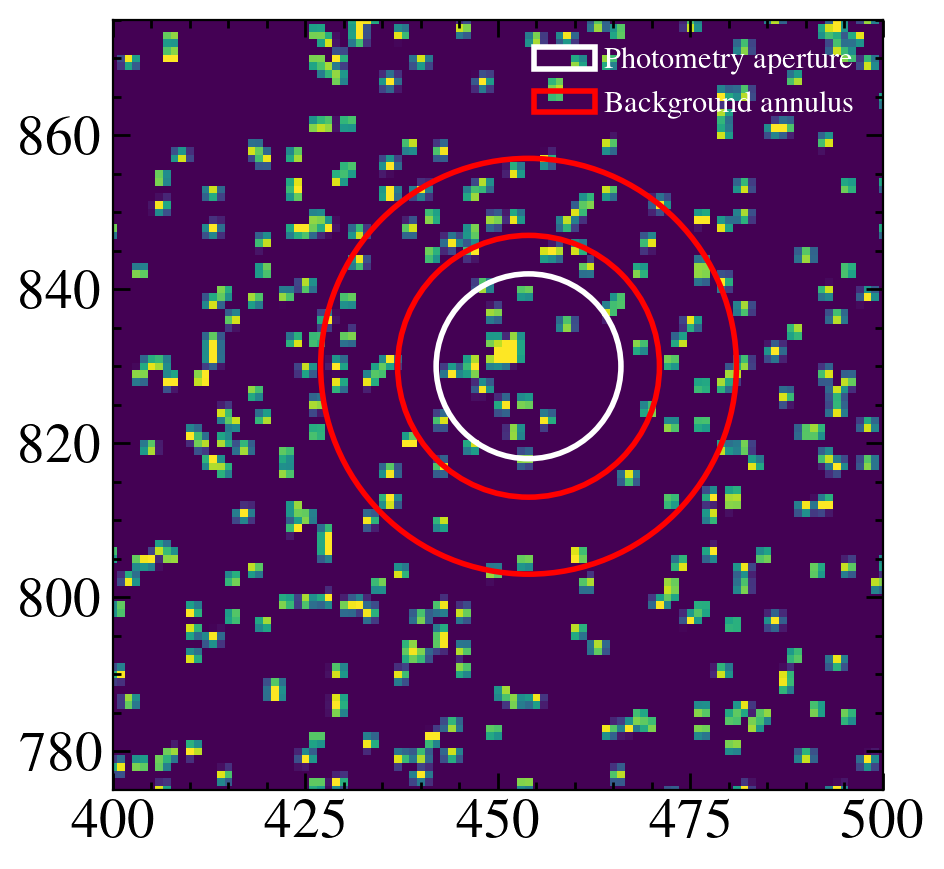

In [102]:
# wfc3_pos = [(489.752, 751.70)]
# wfc3_pos = [(484, 720)]
acs_pos = [(454, 830)]
pixscale = 0.025
ap_arc = '0.30' # aperture size in arcseconds
ap_pix = float(ap_arc)/pixscale #aperture size in pixels
print(ap_pix)

filters = []
fluxes = []
flux_errs = []
starts = []
ends = []
counts = []
counts_errs = []
bkgs = []
# print(eetab['APER#{}'.format(ap_arc)])

# for flc in flcs:
#     print(flc)
#     hdul = fits.open(flc)
# fltsort = np.array(flts)[args]
for drz in drzs:
    print(drz)
    hdul = fits.open(drz)
    filt = hdul[0].header['FILTER1'] 
    print(filt)
    filters.append(filt)
    exptime = hdul[0].header['EXPTIME']
    starts.append(hdul[0].header['EXPSTART'])
    ends.append(hdul[0].header['EXPEND'])
    
    print(exptime)
    data = hdul[1].data
#     data = make_PAMcorr_image_UVIS(data, hdul[1].header, '{}../pams/'.format(path))
#     data = np.nan_to_num(data, 0.0)
    error = hdul[2].data
    dq = hdul[3].data
#     mask = dq != 0
    error = np.sqrt(data*exptime)/exptime
    
    norm = simple_norm(data, 'sqrt', percent=99)
    plt.imshow(data, norm=norm, interpolation='nearest', origin='lower')
    plt.xlim(400, 500)
    plt.ylim(775, 875)
# # positions = [(515, 509), (725, 468)]



    aperture = CircularAperture(acs_pos, r=ap_pix)

    annulus_aperture = CircularAnnulus(acs_pos, r_in=ap_pix+5, r_out=ap_pix+15)

    ap_patches = aperture.plot(color='white', lw=2,
                               label='Photometry aperture')
    ann_patches = annulus_aperture.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    
    phot_table = aperture_photometry(data, aperture, error=error)#, mask=mask)
#     print(phot_table)
    aperture_area = aperture.area_overlap(data)
    sigclip = SigmaClip(sigma=3.0, maxiters=10)
    bkg_stats = ApertureStats(data, annulus_aperture, error=error)#,  sigma_clip=sigclip,)
    total_bkg = bkg_stats.mean * aperture_area
    print(phot_table['aperture_sum'])
#     phot_error = ((phot_table['aperture_sum']*exptime)**0.5)/exptime#calculating error by hand
#     phot_table['aperture_sum_err'] = phot_error
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.4g'  # for consistent table output
        
    if filt =='F150LP':
        ee = 0.715
    if filt == 'F165LP':
        ee = 0.704
    
    photflam = hdul[1].header['PHOTFLAM']
    
    flux = phot_table['aperture_sum_bkgsub'][0] * photflam / ee 
    flux_err = phot_table['aperture_sum_err'][0]* photflam / ee
    print(flux, flux_err)
    
    fluxes.append(flux)
    flux_errs.append(flux_err)

    print(phot_table)
    counts.append(phot_table['aperture_sum_bkgsub'])
    counts_errs.append(phot_table['aperture_sum_err'])
    bkgs.append(phot_table['total_bkg'])

    
    
    
    
    
    
    

    plt.show()
    
starts, ends = np.array(starts), np.array(ends)



savdat = Table([starts, ends, expt, bands, fluxes*u.erg/u.s/u.cm**2/u.AA, flux_errs*u.erg/u.s/u.cm**2/u.AA, roots,counts ,counts_errs,bkgs], 
               names = ['EXPSTART', 'EXPEND', 'EXPTIME', 'FILTER', 'FLUX', 'ERROR', 'ROOTNAME', 'COUNTS', 'COUNTS_ERROR', 'BACKGROUND'])
savdat.write('results/epoch{}_acs_photometry.ecsv'.format(epoch), format='ascii.ecsv', overwrite=True)

<ErrorbarContainer object of 3 artists>

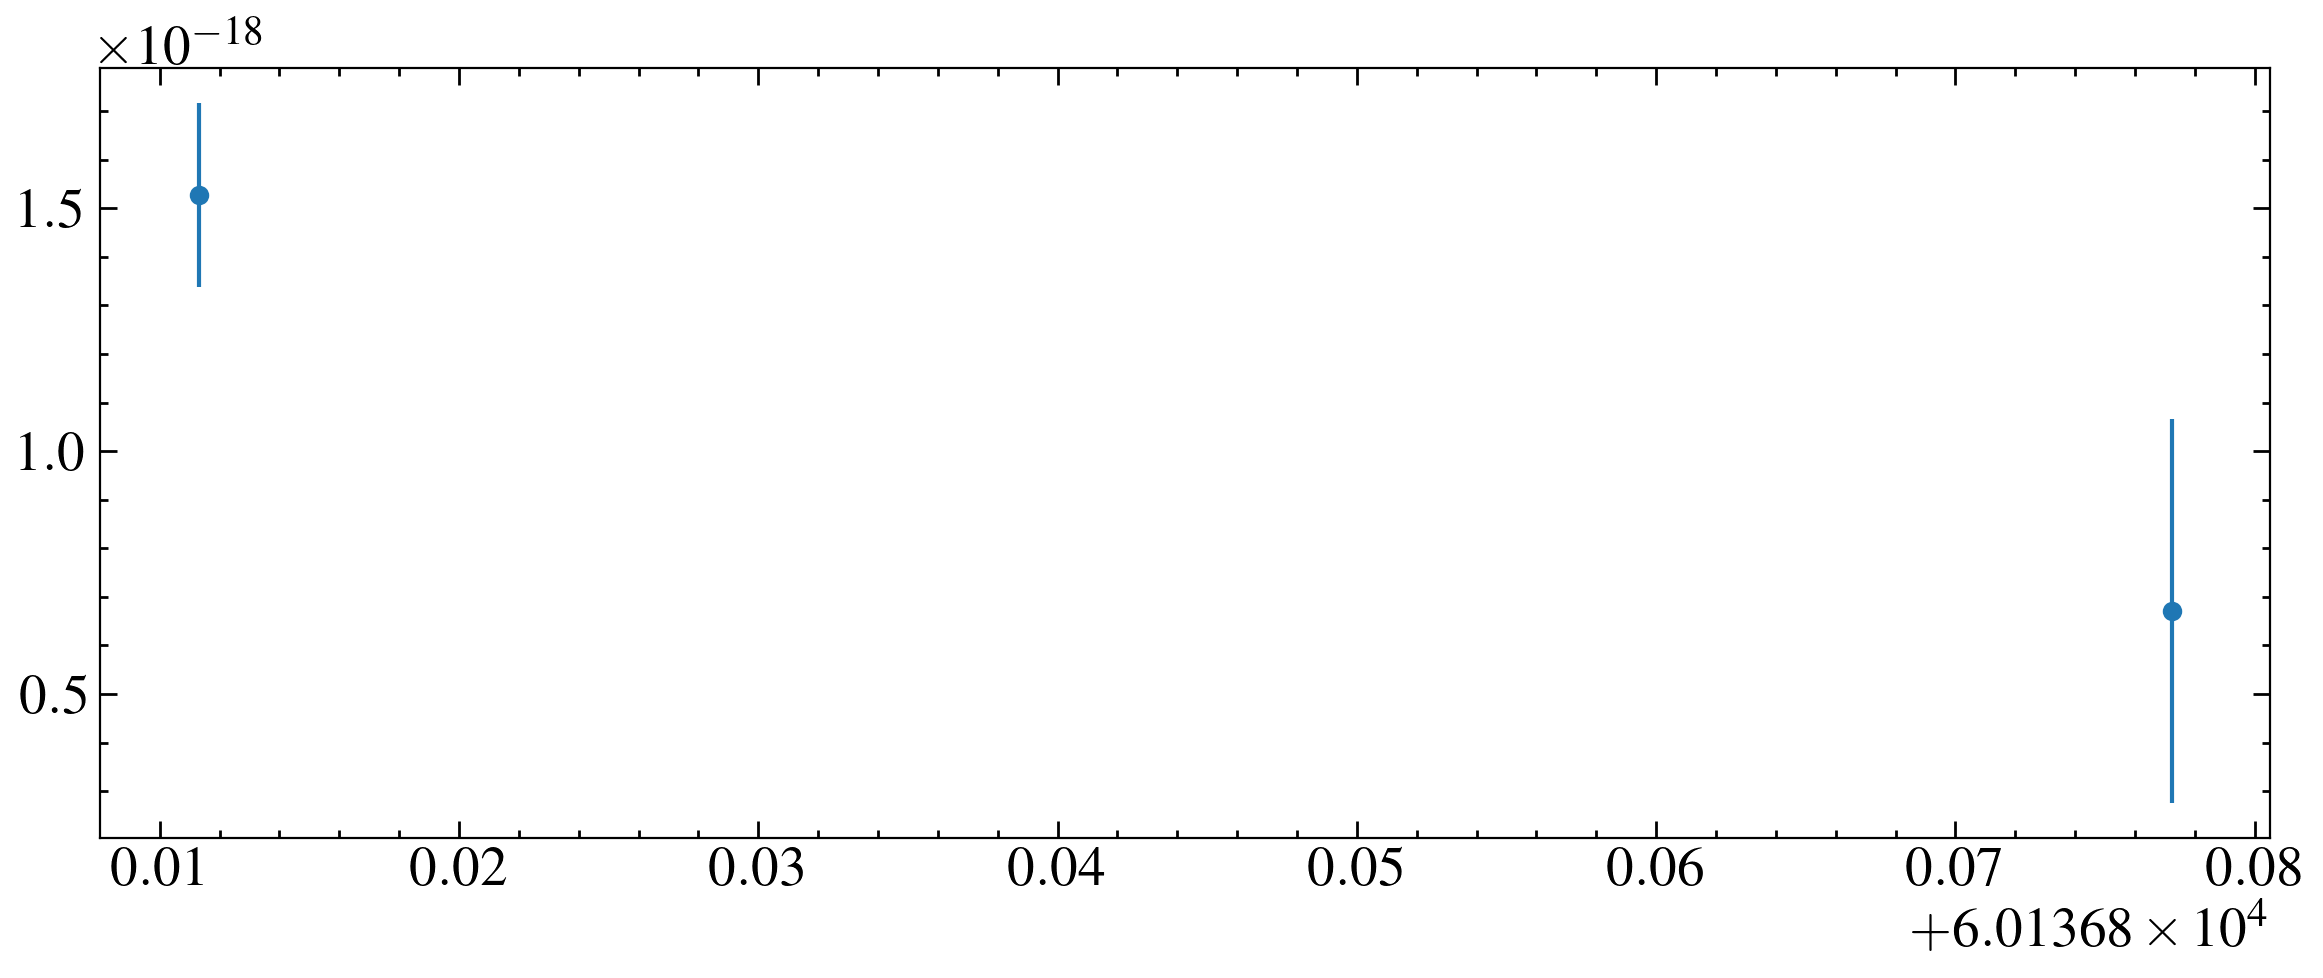

In [99]:
plt.errorbar(starts, fluxes, yerr=flux_errs, ls='none',marker='o')
# plt.axhline(0, ls='--', c='0.5')
# plt.yscale('log')

In [100]:
(0.696+0.701+0.715)/3

0.7039999999999998